In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from wordcloud import WordCloud, STOPWORDS 
import numpy as np

In [2]:
#pip install plotly==5.18.0
#! pip install wordcloud

In [3]:
billboard_df=pd.read_csv('Hot 100 Audio Features.csv')
billboard_df.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0
5,5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",2yLa0QULdQr0qAIvVwN6B5,NaN,208186.0,False,"{'album_type': 'album', 'artists': [{'external...",...,-6.509,1.0,0.1360,0.05270,0.000000,0.197,0.417,160.015,4.0,73.0
6,6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljCWsDlSyJ41kwqym2ORw,NaN,205560.0,True,The Blueprint 2 The Gift & The Curse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,https://p.scdn.co/mp3-preview/a701445830ecacfb...,219813.0,False,Radio Hits Of the '80s,...,-4.247,0.0,0.0274,0.43200,0.000006,0.133,0.952,155.697,4.0,40.0
8,8,"'98 Thug ParadiseTragedy, Capone, Infinite","Tragedy, Capone, Infinite",'98 Thug Paradise,['english indie rock'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Datasset descripion**

In [4]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   SongID                     29503 non-null  object 
 2   Performer                  29503 non-null  object 
 3   Song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_id           24397 non-null  object 
 6   spotify_track_preview_url  14491 non-null  object 
 7   spotify_track_duration_ms  24397 non-null  float64
 8   spotify_track_explicit     24397 non-null  object 
 9   spotify_track_album        24391 non-null  object 
 10  danceability               24334 non-null  float64
 11  energy                     24334 non-null  float64
 12  key                        24334 non-null  float64
 13  loudness                   24334 non-null  flo

In [5]:
billboard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,29503.0,14751.000000,8516.926832,0.000000,7375.50000,14751.000000,22126.50000,29502.000
spotify_track_duration_ms,24397.0,220684.258187,67746.706860,29688.000000,175053.00000,214850.000000,253253.00000,3079157.000
danceability,24334.0,0.599945,0.153133,0.000000,0.49900,0.608000,0.70800,0.988
energy,24334.0,0.618096,0.199078,0.000581,0.47600,0.634000,0.77800,0.997
key,24334.0,5.231651,3.560211,0.000000,2.00000,5.000000,8.00000,11.000
loudness,24334.0,-8.664607,3.601119,-28.030000,-11.03400,-8.205000,-5.85625,2.291
mode,24334.0,0.727172,0.445422,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,24334.0,0.073554,0.083153,0.000000,0.03210,0.041300,0.06830,0.951
acousticness,24334.0,0.294635,0.282300,0.000003,0.04670,0.195000,0.50800,0.991
instrumentalness,24334.0,0.032539,0.136276,0.000000,0.00000,0.000005,0.00046,0.982


In [6]:
billboard_df.tail(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
29498,29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,FUTURE,...,-7.673,1.0,0.426,0.0145,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!Going Places!!!,...,-12.702,1.0,0.323,0.1540,0.279000,0.0584,0.192,82.107,4.0,35.0
29502,29502,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,-9.642,1.0,0.140,0.0478,0.000363,0.0392,0.619,103.743,4.0,28.0


# **Drop column that we are not interest/usable** 

* **spotify_track_id**

* **spotify_track_preview_url column**

In [7]:
del billboard_df['spotify_track_id']
del billboard_df['spotify_track_preview_url']
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   SongID                     29503 non-null  object 
 2   Performer                  29503 non-null  object 
 3   Song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  24397 non-null  float64
 6   spotify_track_explicit     24397 non-null  object 
 7   spotify_track_album        24391 non-null  object 
 8   danceability               24334 non-null  float64
 9   energy                     24334 non-null  float64
 10  key                        24334 non-null  float64
 11  loudness                   24334 non-null  float64
 12  mode                       24334 non-null  float64
 13  speechiness                24334 non-null  flo

* **Dropp nan row  genere column**

In [8]:
billboard_df=billboard_df[billboard_df['spotify_genre'].notna()]

In [9]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27903 entries, 0 to 29502
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27903 non-null  int64  
 1   SongID                     27903 non-null  object 
 2   Performer                  27903 non-null  object 
 3   Song                       27903 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  24249 non-null  float64
 6   spotify_track_explicit     24249 non-null  object 
 7   spotify_track_album        24243 non-null  object 
 8   danceability               24190 non-null  float64
 9   energy                     24190 non-null  float64
 10  key                        24190 non-null  float64
 11  loudness                   24190 non-null  float64
 12  mode                       24190 non-null  float64
 13  speechiness                24190 non-null  float64


* **Replace nan value in column 'spotify_track_album', with 'single',most of the track that are not in a album are single , to not unnecessarily drop to many rows** 

In [10]:
billboard_df.spotify_track_album.fillna('single',inplace=True)

In [11]:
billboard_df.spotify_track_album.head(5)

0                                            single
1                                            single
2                       The Essential Andy Williams
3                             Compelling Percussion
4    ...Baby One More Time (Digital Deluxe Version)
Name: spotify_track_album, dtype: object

* **Replace nan value in column 'spotify_track_explicit', with unknown, to not unnecessarily drop to many rows**

In [12]:
billboard_df.spotify_track_explicit.fillna('unknown',inplace=True)
billboard_df.spotify_track_explicit.head(5)

0    unknown
1    unknown
2      False
3      False
4      False
Name: spotify_track_explicit, dtype: object

# Genere attribution

In [13]:
billboard_df.spotify_genre.head()

0                                                   []
1                                          ['novelty']
2    ['adult standards', 'brill building pop', 'eas...
3     ['rock-and-roll', 'space age pop', 'surf music']
4                ['dance pop', 'pop', 'post-teen pop']
Name: spotify_genre, dtype: object

# **Attribute maingere**

In [14]:
#def return_main_genere():
lista_main_generi=['pop','metal','rock','rap','trap','jazz','blues','country','indie','house','hip hop','techno','folk','reggae','punk','disco','classical','gospel','soul','instrumental','celtic','drill','dance','r&b','sertanejo','cumbia','electronic','lo-fi','ska','doom','prog','piano','soundtrack','salsa','cumbia','orchestra','beat','psych','alt','emo','old school','romantic','funk','choral','songwriter','talent show','latin','experimental','rumba','glitch','ambient']
billboard_df['maingenere']='other'


for index,generi in billboard_df.spotify_genre.items():
    #print(index)
    prova=str(generi).replace('[',"").replace(']',"").replace("'","").replace('"',"").replace(',',"").replace('-'," ")

    counts = dict()

    # Split the input string 'str' into a list of words using spaces as separators and store it in the 'words' list.
    prova2 = prova.split( )
    #print(prova2)

    # Iterate through each word in the 'words' list.
    for word in prova2:
        # Check if the word is already in the 'counts' dictionary.
        if word in counts:
            # If the word is already in the dictionary, increment its frequency by 1.
            counts[word] += 1
        else:
            # If the word is not in the dictionary, add it to the dictionary with a frequency of 1.
            counts[word] = 1

    lista_tuple_generi = sorted(counts.items(), key = lambda x:x[1], reverse=True)       
    #print(lista_tuple_generi) # abbiamo creato un dizionario dove contiamo quante volte un genere è presente per ogni riga del df

    primo = False
    for tuple_genere in lista_tuple_generi:
        if primo == False: 
            if tuple_genere[0] in lista_main_generi:
                #print(tuple_genere[0])
                primo =True
            
                billboard_df.loc[index,'maingenere']=tuple_genere[0]
        #print(tuple_genere)
                



* **how many songs for genere**

In [15]:
billboard_df.maingenere.value_counts()

maingenere
pop             7590
rock            5156
other           4167
soul            2499
rap             2259
country         2218
disco            602
jazz             404
blues            397
funk             351
dance            347
metal            307
folk             305
house            242
indie            178
r&b              158
latin            139
trap              94
emo               89
reggae            79
instrumental      73
punk              39
romantic          30
gospel            25
classical         23
drill             19
songwriter        18
soundtrack        16
beat              12
piano             11
celtic            11
electronic        10
techno             9
ska                8
experimental       5
sertanejo          2
glitch             2
orchestra          2
ambient            2
prog               1
doom               1
salsa              1
cumbia             1
alt                1
Name: count, dtype: int64

# **Substitute nan value**

In [16]:
billboard_df.spotify_track_duration_ms.mean()

220741.0859004495

* **Substitute 'spotify_track_duration_ms' with the mean for genere**
    * **example with one genere**

In [17]:
copy_bi_df = billboard_df.copy()

In [18]:
mask_other=billboard_df.maingenere=='other'

In [19]:
other_df=billboard_df[mask_other]
other_df.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
11,11,'til It's Time To Say GoodbyeJonathan Cain,Jonathan Cain,'til It's Time To Say Goodbye,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
17,17,"""B"" GirlsYoung And Restless",Young And Restless,"""B"" Girls",[],242106.0,False,Something To Get You Hyped,0.615,0.497,...,1.0,0.439,0.016,0.0,0.312,0.769,193.762,3.0,20.0,other


In [20]:
other_df.shape

(4167, 22)

In [21]:
media_other_duration=round(other_df.spotify_track_duration_ms.mean(),2)
media_other_duration

205787.48

In [22]:
other_df.spotify_track_duration_ms.fillna(media_other_duration,inplace=True)

<ipython-input-22-723b6b1d0250>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
sum(other_df.spotify_track_duration_ms.isnull())

0

* **i want to iterate for each genere**
    * **so i have to create a mask to each genere, and apply that to all the column '**

In [24]:
billboard_df.spotify_track_duration_ms.isnull().any()

True

* **we apppend 'other' in lista_main_generi**

In [25]:
lista_main_generi_other = lista_main_generi.copy()
lista_main_generi_other.append('other')
lista_main_generi_other

['pop',
 'metal',
 'rock',
 'rap',
 'trap',
 'jazz',
 'blues',
 'country',
 'indie',
 'house',
 'hip hop',
 'techno',
 'folk',
 'reggae',
 'punk',
 'disco',
 'classical',
 'gospel',
 'soul',
 'instrumental',
 'celtic',
 'drill',
 'dance',
 'r&b',
 'sertanejo',
 'cumbia',
 'electronic',
 'lo-fi',
 'ska',
 'doom',
 'prog',
 'piano',
 'soundtrack',
 'salsa',
 'cumbia',
 'orchestra',
 'beat',
 'psych',
 'alt',
 'emo',
 'old school',
 'romantic',
 'funk',
 'choral',
 'songwriter',
 'talent show',
 'latin',
 'experimental',
 'rumba',
 'glitch',
 'ambient',
 'other']

## **We substitute all 'NaN' with the mean for maingenere**

In [26]:
for null_column in billboard_df:
    if billboard_df[null_column].isnull().any() == True :
        for generi_in_l in lista_main_generi_other:
            mask_generi=billboard_df.maingenere==generi_in_l
            genere_df=billboard_df[mask_generi]

            mean_generi=round(genere_df[null_column].mean(),2)

            #billboard_df[mask_generi][null_column].fillna(mean_generi,inplace=True)

            billboard_df.loc[mask_generi, null_column] = billboard_df.loc[mask_generi, [null_column]].fillna(mean_generi)

In [27]:
billboard_df.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",166106.00,False,The Essential Andy Williams,0.154,0.185,...,1.00,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.00,38.00,pop
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",172066.00,False,Compelling Percussion,0.588,0.672,...,0.00,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.00,11.00,rock
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",211066.00,False,...Baby One More Time (Digital Deluxe Version),0.759,0.699,...,0.00,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.00,77.00,pop
5,5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",208186.00,False,"{'album_type': 'album', 'artists': [{'external...",0.613,0.764,...,1.00,0.1360,0.05270,0.000000,0.197,0.417,160.015,4.00,73.00,pop
6,6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",205560.00,True,The Blueprint 2 The Gift & The Curse,0.730,0.650,...,0.57,0.2100,0.15000,0.010000,0.200,0.500,121.310,4.00,61.00,rap
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",219813.00,False,Radio Hits Of the '80s,0.647,0.686,...,0.00,0.0274,0.43200,0.000006,0.133,0.952,155.697,4.00,40.00,rock
8,8,"'98 Thug ParadiseTragedy, Capone, Infinite","Tragedy, Capone, Infinite",'98 Thug Paradise,['english indie rock'],222783.59,unknown,single,0.580,0.660,...,0.70,0.0500,0.22000,0.050000,0.190,0.640,121.370,3.94,37.33,indie
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other


In [28]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27903 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27903 non-null  int64  
 1   SongID                     27903 non-null  object 
 2   Performer                  27903 non-null  object 
 3   Song                       27903 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  27901 non-null  float64
 6   spotify_track_explicit     27903 non-null  object 
 7   spotify_track_album        27903 non-null  object 
 8   danceability               27901 non-null  float64
 9   energy                     27901 non-null  float64
 10  key                        27901 non-null  float64
 11  loudness                   27901 non-null  float64
 12  mode                       27901 non-null  float64
 13  speechiness                27901 non-null  float64


* **Now we have a clean dataset,but for some genere we can't obtain the mean**
    * **we drop this value**

In [29]:
billboard_df=billboard_df.dropna()
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27901 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27901 non-null  int64  
 1   SongID                     27901 non-null  object 
 2   Performer                  27901 non-null  object 
 3   Song                       27901 non-null  object 
 4   spotify_genre              27901 non-null  object 
 5   spotify_track_duration_ms  27901 non-null  float64
 6   spotify_track_explicit     27901 non-null  object 
 7   spotify_track_album        27901 non-null  object 
 8   danceability               27901 non-null  float64
 9   energy                     27901 non-null  float64
 10  key                        27901 non-null  float64
 11  loudness                   27901 non-null  float64
 12  mode                       27901 non-null  float64
 13  speechiness                27901 non-null  float64


# **Now i have a clean dataset**

------------------------------------------------------------------------------------------------------

# **2**

## **I want to consider only numeric variables to see how they are correlated**

In [30]:
numeric_variable_df=billboard_df.iloc[:,8:21] # i can put this part i the description part 
numeric_variable_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0.59,0.57,5.37,-9.97,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16
1,0.59,0.57,5.37,-9.97,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16


In [31]:
#sb.pairplot(numeric_variable_df[:50])
# between this sample we can see if the variable are i same way correlated

### **an initial correlation exploration**

In [32]:
df_corr = numeric_variable_df.corr(method='pearson')
df_corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
danceability,1.000000,0.203417,0.015149,0.141606,-0.164547,0.265746,-0.316519,-0.005995,-0.129454,0.379403,-0.144507,0.224386,0.186305
energy,0.203417,1.000000,0.022612,0.686004,-0.103805,0.135084,-0.591225,-0.008291,0.109251,0.346806,0.161827,0.231248,0.189897
key,0.015149,0.022612,1.000000,0.009180,-0.143750,0.023357,-0.021284,0.002978,-0.001168,0.012993,-0.014552,0.009267,0.000542
loudness,0.141606,0.686004,0.009180,1.000000,-0.083049,0.179265,-0.415929,-0.144436,0.039800,0.008661,0.096598,0.127108,0.366277
mode,-0.164547,-0.103805,-0.143750,-0.083049,1.000000,-0.138592,0.144358,-0.007315,0.013393,-0.016005,0.017814,-0.057670,-0.121244
speechiness,0.265746,0.135084,0.023357,0.179265,-0.138592,1.000000,-0.163858,-0.060775,0.076939,-0.035334,0.061901,0.089475,0.219434
acousticness,-0.316519,-0.591225,-0.021284,-0.415929,0.144358,-0.163858,1.000000,0.038271,0.042167,-0.111412,-0.106473,-0.220068,-0.321468
instrumentalness,-0.005995,-0.008291,0.002978,-0.144436,-0.007315,-0.060775,0.038271,1.000000,-0.010540,0.052446,-0.000734,0.003939,-0.135589
liveness,-0.129454,0.109251,-0.001168,0.039800,0.013393,0.076939,0.042167,-0.010540,1.000000,0.026576,0.019334,-0.015298,-0.074701
valence,0.379403,0.346806,0.012993,0.008661,-0.016005,-0.035334,-0.111412,0.052446,0.026576,1.000000,0.068990,0.137994,-0.224525


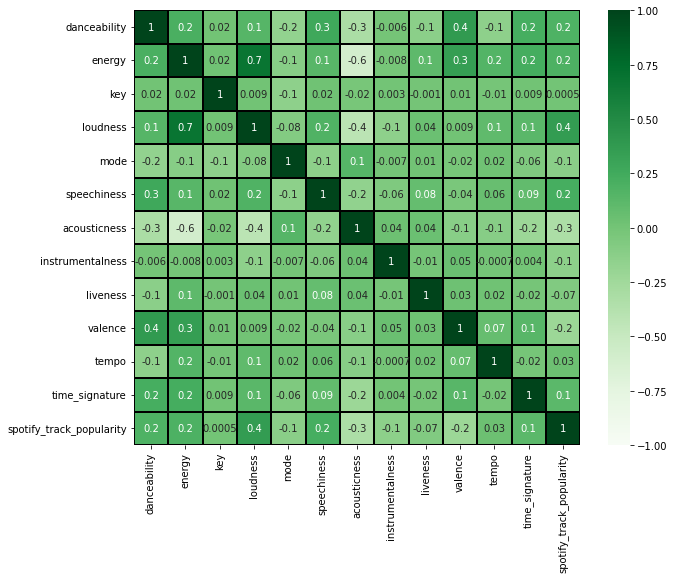

In [33]:
plt.figure(figsize=(10,8))
sb.heatmap(df_corr,annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=0.1, linecolor='black')
plt.show()

# correlazione negativa tra energy & acusticness 0.6 -> loudness & energy 0.7 -> loudness & popularity 0.4 -> valence popularity 0.4

* **Relaion between energy and loudness**

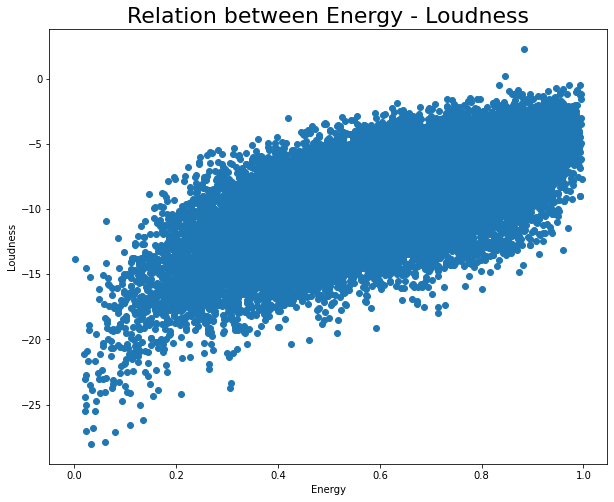

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(billboard_df.energy,billboard_df.loudness)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Relation between Energy - Loudness',size=22)
plt.show()

* **relation between energy and acusticness**

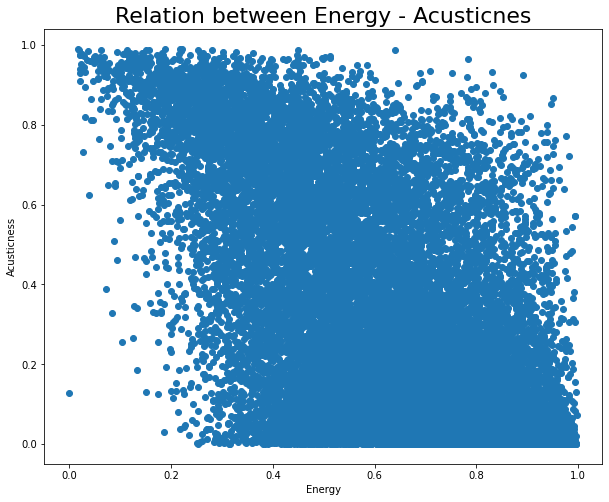

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(billboard_df.energy,billboard_df.acousticness)
plt.xlabel('Energy')
plt.ylabel('Acusticness')
plt.title('Relation between Energy - Acusticnes',size=22)
plt.show()

* **relation between Loudness - popularity**

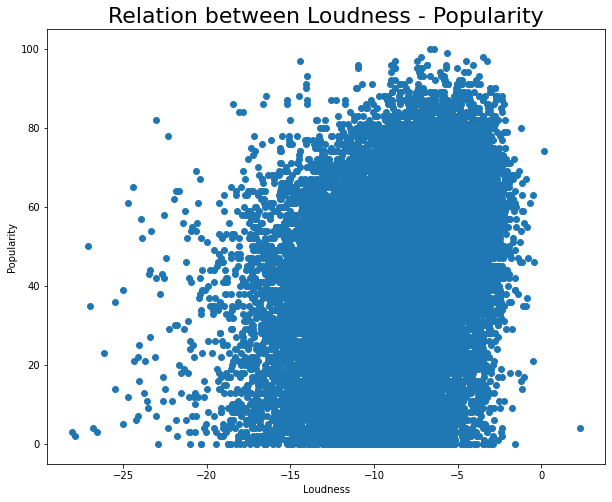

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(billboard_df.loudness,billboard_df.spotify_track_popularity)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Relation between Loudness - Popularity',size=22)
plt.show()

* **relation between Valence - popularity**

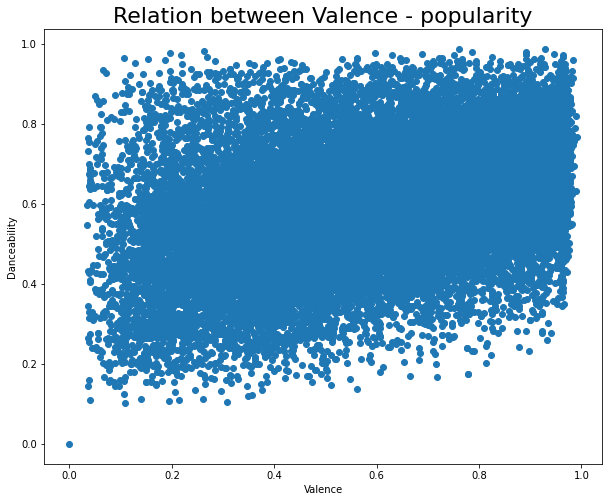

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(billboard_df.valence,billboard_df.danceability)
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.title('Relation between Valence - popularity',size=22)
plt.show()

* **try to make a subplot with this two high correlated variable + two less correlated**

<ipython-input-38-373c82ffd7b8>:19: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



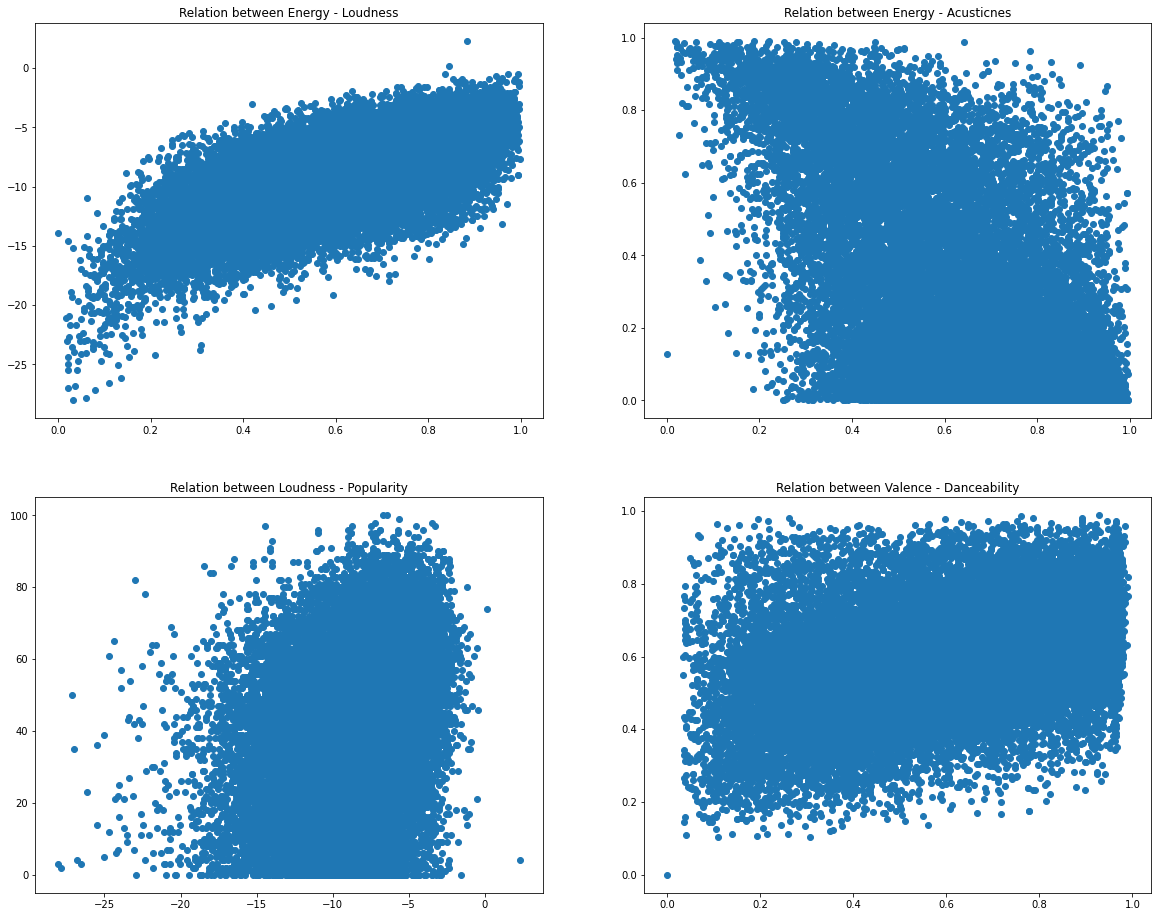

In [38]:
fig_1 = plt.figure(figsize=(20, 16))
ax_1 = fig_1.add_subplot(2, 2, 1)
ax_2 = fig_1.add_subplot(2, 2, 2)
ax_3 = fig_1.add_subplot(2, 2, 3)
ax_4 = fig_1.add_subplot(2, 2, 4)

ax_1.scatter(billboard_df.energy,billboard_df.loudness)
ax_1.title.set_text('Relation between Energy - Loudness')

ax_2.scatter(billboard_df.energy,billboard_df.acousticness)
ax_2.title.set_text('Relation between Energy - Acusticnes')

ax_3.scatter(billboard_df.loudness,billboard_df.spotify_track_popularity)
ax_3.title.set_text('Relation between Loudness - Popularity')

ax_4.scatter(billboard_df.valence,billboard_df.danceability)
ax_4.title.set_text('Relation between Valence - Danceability')

fig_1.show()

----------------------------------------------------------------------------------------------------------------------

# **3**

###  **How many songs for genere?**

* **we want to plot it**

In [39]:
numbers_of_genere=billboard_df.maingenere.value_counts()[0:12]
numbers_of_genere

maingenere
pop        7590
rock       5156
other      4167
soul       2499
rap        2259
country    2218
disco       602
jazz        404
blues       397
funk        351
dance       347
metal       307
Name: count, dtype: int64

In [40]:
numbers_of_genere.index

Index(['pop', 'rock', 'other', 'soul', 'rap', 'country', 'disco', 'jazz',
       'blues', 'funk', 'dance', 'metal'],
      dtype='object', name='maingenere')

**I decide to rappresent only the twelve main genre, becuse the other rappresent only the 1%**

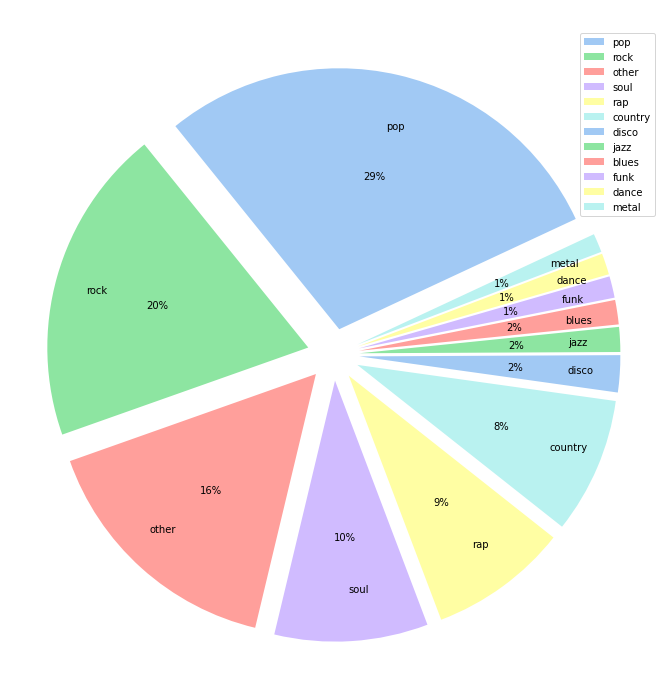

In [41]:
plt.figure(figsize=(12,12))
color=sb.color_palette('pastel6')
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
lables=numbers_of_genere.index
plt.pie(numbers_of_genere,labels=lables, startangle=25,labeldistance=0.8,autopct='%1.0f%%',colors=color,explode=explode)
plt.title('Percentige of total genre',size=22,color='white')
plt.legend()
plt.show()

* **another interest plot coulb be:**

## **Use WordCloud**

In [42]:
#print(type(billboard_df.maingenere.value_counts()))
genere_distribution=billboard_df.maingenere.value_counts()


In [43]:
genere_distribution_no_col_maingenere=genere_distribution.to_string(header=False)

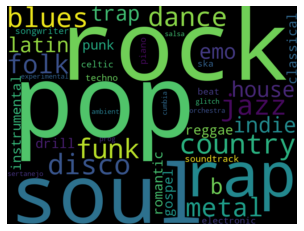

In [44]:
color=sb.color_palette('pastel6')
genere_importance = WordCloud(width=800, height=600, margin=0).generate(str(genere_distribution_no_col_maingenere))
# Display the generated image:
plt.imshow(genere_importance, interpolation='bilinear')
plt.axis("off")
#plt.title('Most popular genere',size=22)
plt.show()

# capire come togliere maingenere

## **Subplot that summarize the main charachteristic for each genere**

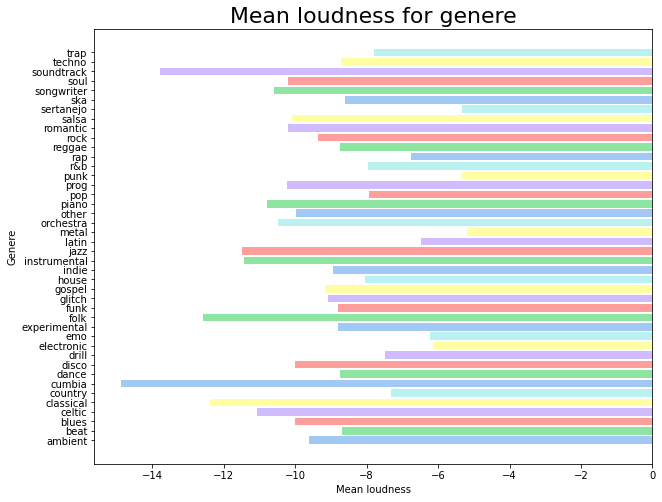

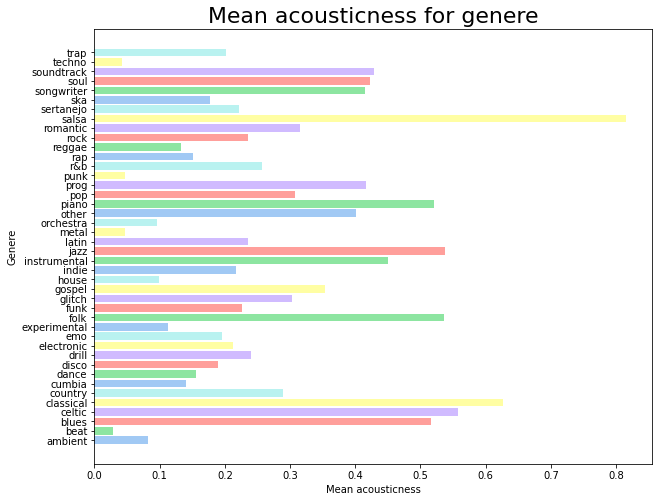

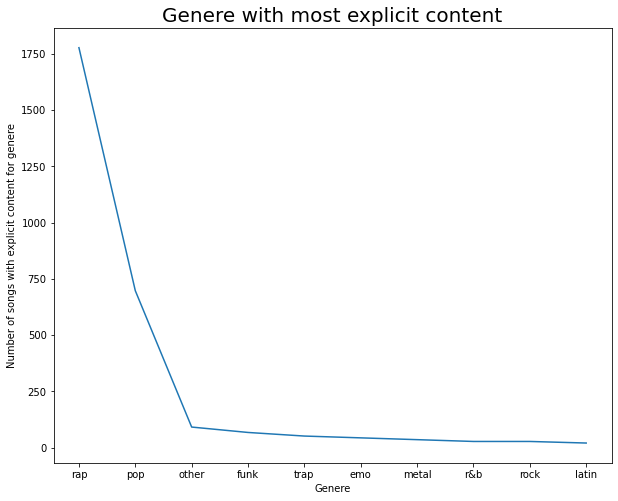

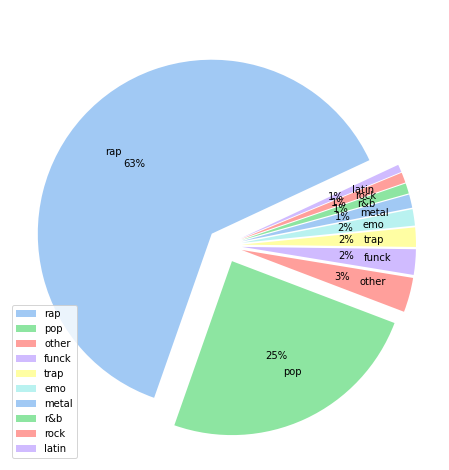

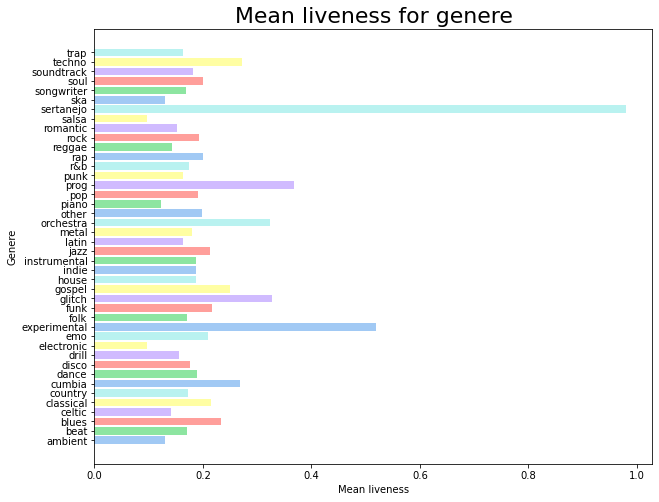

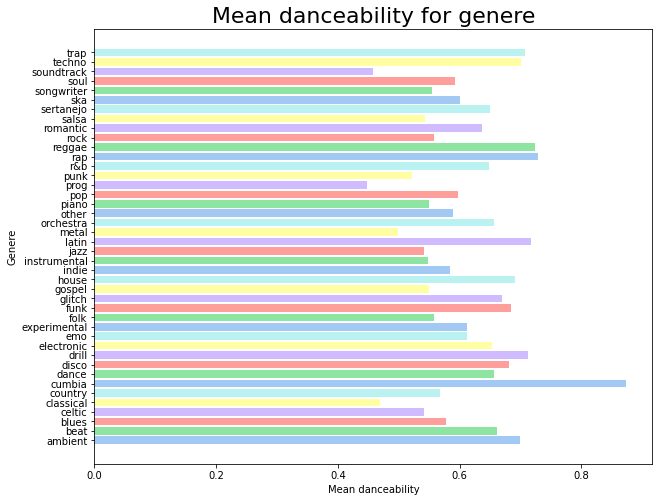

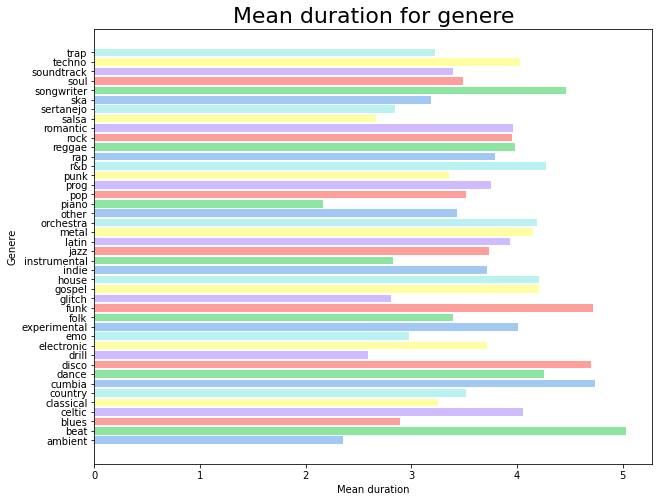

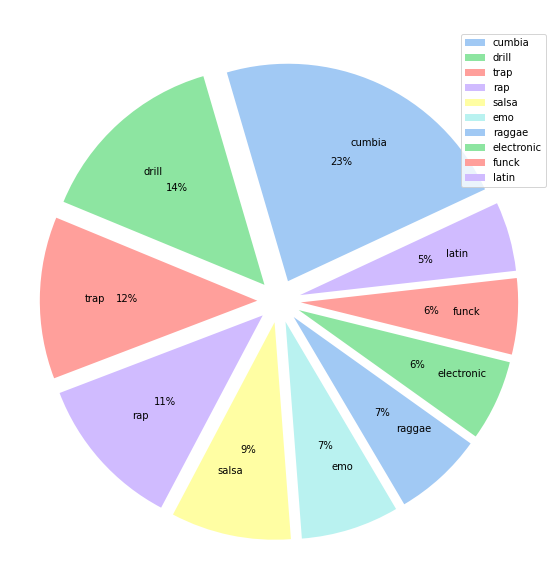

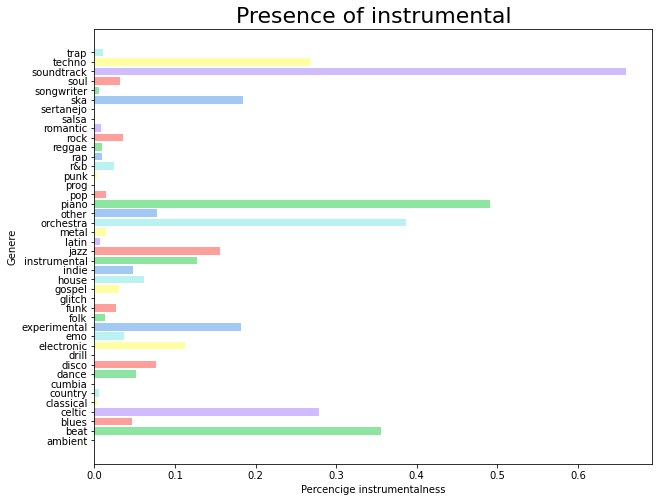

In [45]:
# Loudness

best_loudness_GENERE_df=pd.DataFrame(columns=['maingenere','loudness'])
best_loudness_GENERE_df['maingenere']=billboard_df.maingenere
best_loudness_GENERE_df['loudness']=billboard_df.loudness

best_loudness_GENERE_df.head(2)

best_loudness_GENERE_gb=best_loudness_GENERE_df.groupby('maingenere').mean(numeric_only=True)

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(best_loudness_GENERE_gb.index,best_loudness_GENERE_gb.loudness,color=color)
plt.ylabel('Genere')
plt.xlabel('Mean loudness')
plt.title('Mean loudness for genere',size=22)
plt.show()

# Acousticnes

best_acousticness_GENERE_df=pd.DataFrame(columns=['maingenere','acousticness'])
best_acousticness_GENERE_df['maingenere']=billboard_df.maingenere
best_acousticness_GENERE_df['acousticness']=billboard_df.acousticness

best_acousticness_GENERE_df.head(2)

best_acousticness_GENERE_gb=best_acousticness_GENERE_df.groupby('maingenere').mean(numeric_only=True)
best_acousticness_GENERE_gb

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(best_acousticness_GENERE_gb.index,best_acousticness_GENERE_gb.acousticness,color=color)
plt.ylabel('Genere')
plt.xlabel('Mean acousticness')
plt.title('Mean acousticness for genere',size=22)
plt.show()

# Explicit

mask_explict_true=billboard_df.spotify_track_explicit == True
mask_explict_true

billboard_explicit_df=billboard_df[mask_explict_true]
billboard_explicit_df.head(5)

billboard_explicit_df.spotify_track_explicit.value_counts()

top_10_exlicit_genere=billboard_explicit_df.maingenere.value_counts()[0:10]
top_10_exlicit_genere

plt.figure(figsize=(10,8))
plt.plot(top_10_exlicit_genere)
plt.title('Genere with most explicit content',size=20)
plt.xlabel('Genere')
plt.ylabel('Number of songs with explicit content for genere')
plt.show()

plt.figure(figsize=(10,8))
col=sb.color_palette('pastel6')
exp=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(top_10_exlicit_genere,colors=col,autopct='%1.0f%%',labels=['rap','pop','other','funck','trap','emo','metal','r&b','rock','latin'],explode=exp,startangle=25,labeldistance=0.7)
plt.title('Genere with most explicit content',size=20,color='white')
plt.legend()
plt.show()

# Liveness

best_liveness_GENERE_df=pd.DataFrame(columns=['maingenere','liveness'])
best_liveness_GENERE_df['maingenere']=billboard_df.maingenere
best_liveness_GENERE_df['liveness']=billboard_df.liveness

best_liveness_GENERE_df.head(2)

best_liveness_GENERE_gb=best_liveness_GENERE_df.groupby('maingenere').mean(numeric_only=True)

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(best_liveness_GENERE_gb.index,best_liveness_GENERE_gb.liveness,color=color)
plt.ylabel('Genere')
plt.xlabel('Mean liveness')
plt.title('Mean liveness for genere',size=22)
plt.show()

# Danceability

spotify_track_dance_ms_maingenere_GENEREdf=pd.DataFrame(columns=['maingenere','danceability'])
spotify_track_dance_ms_maingenere_GENEREdf['maingenere']=billboard_df.maingenere
spotify_track_dance_ms_maingenere_GENEREdf['danceability']=billboard_df.danceability

spotify_track_dance_ms_maingenere_GENEREdf.head(3)

maingenere_gb_dance=spotify_track_dance_ms_maingenere_GENEREdf.groupby('maingenere').mean(numeric_only=True)
maingenere_gb_dance

serie_maing_dance=maingenere_gb_dance.squeeze()

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(maingenere_gb_dance.index,maingenere_gb_dance.danceability,color=color)
plt.ylabel('Genere')
plt.xlabel('Mean danceability')
plt.title('Mean danceability for genere',size=22)
plt.show()

# Duration 

spotify_track_duration_ms_maingenere_GENEREdf=pd.DataFrame(columns=['maingenere','Song','Performer','spotify_track_duration_minute'])
spotify_track_duration_ms_maingenere_GENEREdf['maingenere']=billboard_df.maingenere
spotify_track_duration_ms_maingenere_GENEREdf['Song']=billboard_df.Song
spotify_track_duration_ms_maingenere_GENEREdf['Performer']=billboard_df.Performer
spotify_track_duration_ms_maingenere_GENEREdf['spotify_track_duration_minute']=billboard_df.spotify_track_duration_ms/60000

spotify_track_duration_ms_maingenere_GENEREdf.head(3)

spoty_duration_for_genere_df=spotify_track_duration_ms_maingenere_GENEREdf.groupby('maingenere').mean(numeric_only=True)
spoty_duration_for_genere_df.head(3)

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(spoty_duration_for_genere_df.index,spoty_duration_for_genere_df.spotify_track_duration_minute,color=color)
plt.ylabel('Genere')
plt.xlabel('Mean duration')
plt.title('Mean duration for genere',size=22)
plt.show()

# Speechiness

speechiness_genre_df=pd.DataFrame(columns=['maingenere','speechiness'])
speechiness_genre_df['maingenere']=billboard_df.maingenere
speechiness_genre_df['speechiness']=billboard_df.speechiness

speechiness_genre_df.head(5)

most_10_speechiness_genere=speechiness_genre_df.groupby('maingenere').mean(numeric_only=True).sort_values(by='speechiness',ascending=False)[0:10]
most_10_speechiness_genere

ser=most_10_speechiness_genere['speechiness'].squeeze()
ser

plt.figure(figsize=(10,10))
color=sb.color_palette('pastel6')
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
label=['cumbia','drill','trap','rap','salsa','emo','raggae','electronic','funck','latin']
plt.pie(ser,colors=color,labels=label,explode=explode,startangle=25,labeldistance=0.7,autopct='%1.0f%%')
plt.title('Top speechiness for genere',size=22,color='white')
plt.legend()
plt.show()

# Instrumentalness

instrum_genre_df=pd.DataFrame(columns=['maingenere','instrumentalness'])
instrum_genre_df['maingenere']=billboard_df.maingenere
instrum_genre_df['instrumentalness']=billboard_df.instrumentalness

instrum_genre_df.head(5)

most_instrum_genere=instrum_genre_df.groupby('maingenere').mean(numeric_only=True).sort_values(by='instrumentalness',ascending=False)
most_instrum_genere

most_instrum_genere_notsort=instrum_genre_df.groupby('maingenere').mean(numeric_only=True)

plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(most_instrum_genere_notsort.index,most_instrum_genere_notsort.instrumentalness,color=color)
plt.ylabel('Genere')
plt.xlabel('Percencige instrumentalness')
plt.title('Presence of instrumental',size=22)
plt.show()

-----------------------------------------------------------------

<ipython-input-46-6aeb41af8150>:23: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



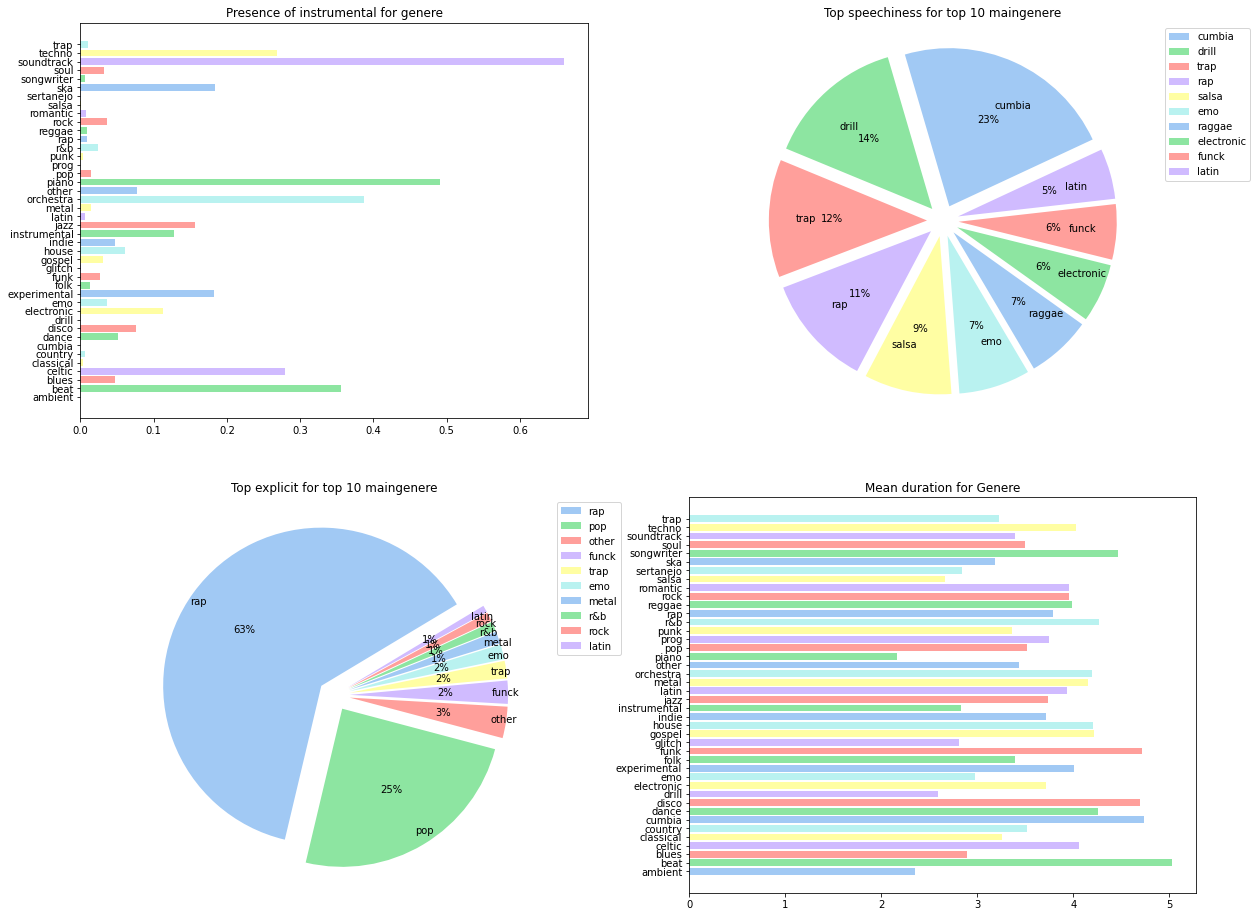

In [46]:
fig_11 = plt.figure(figsize=(20,16))
ax_1 = fig_11.add_subplot(2, 2, 1)
ax_2 = fig_11.add_subplot(2, 2, 2)
ax_3 = fig_11.add_subplot(2, 2, 3)
ax_4 = fig_11.add_subplot(2, 2, 4)

ax_1.barh(most_instrum_genere_notsort.index,most_instrum_genere_notsort.instrumentalness,color=color)
ax_1.title.set_text('Presence of instrumental for genere')

most_instrum_genere_notsort

ax_2.pie(ser,colors=color,labels=label,explode=explode,startangle=25,labeldistance=0.7,autopct='%1.0f%%')
ax_2.title.set_text('Top speechiness for top 10 maingenere')
ax_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax_3.pie(top_10_exlicit_genere,colors=col,autopct='%1.0f%%',labels=['rap','pop','other','funck','trap','emo','metal','r&b','rock','latin'],explode=exp,startangle=31,labeldistance=0.9)
ax_3.title.set_text('Top explicit for top 10 maingenere')
ax_3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax_4.barh(spoty_duration_for_genere_df.index,spoty_duration_for_genere_df.spotify_track_duration_minute,color=color)
ax_4.title.set_text('Mean duration for Genere')

fig_11.show()

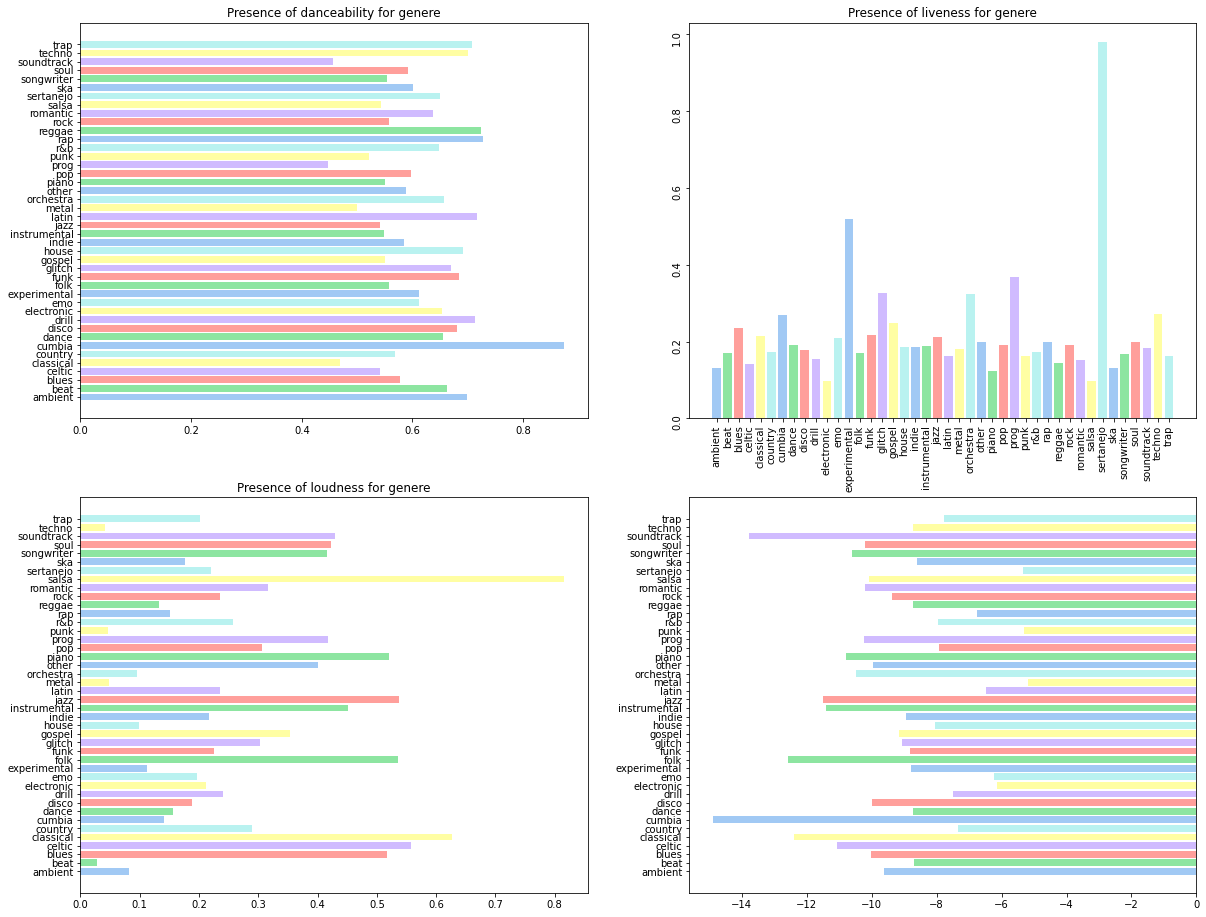

In [47]:
fig_111 = plt.figure(figsize=(20,16))
ax_1 = fig_111.add_subplot(2, 2, 1)
ax_2 = fig_111.add_subplot(2, 2, 2)
ax_3 = fig_111.add_subplot(2, 2, 3)
ax_4 = fig_111.add_subplot(2, 2, 4)

ax_1.barh(maingenere_gb_dance.index,maingenere_gb_dance.danceability,color=color)
ax_1.title.set_text('Presence of danceability for genere')

ax_2.bar(best_liveness_GENERE_gb.index,best_liveness_GENERE_gb.liveness,color=color)
ax_2.tick_params(rotation=90)
ax_2.title.set_text('Presence of liveness for genere')

ax_3.barh(best_acousticness_GENERE_gb.index,best_acousticness_GENERE_gb.acousticness,color=color)
ax_3.title.set_text('Presence of acousticness for genere')

ax_4.barh(best_loudness_GENERE_gb.index,best_loudness_GENERE_gb.loudness,color=color)
ax_3.title.set_text('Presence of loudness for genere')

# **Quick analysis genere/popularity**

In [48]:
maingenere_gb=billboard_df.groupby('maingenere').mean(numeric_only=True)
maingenere_gb.head(5)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
maingenere,,,,,,,,,,,,,,,
ambient,22082.000000,141173.000000,0.699000,0.492000,6.000000,-9.608000,1.000000,0.030500,0.082100,0.000000,0.130000,0.500500,114.961500,4.000000,0.000000
beat,16037.416667,301851.916667,0.662083,0.868500,6.250000,-8.685417,0.583333,0.075150,0.028512,0.356240,0.170767,0.520217,123.309250,4.000000,49.500000
blues,14780.944584,173611.876675,0.577146,0.553683,5.387380,-10.011668,0.830302,0.059684,0.516466,0.047127,0.233938,0.739947,119.458909,3.773224,19.879194
celtic,18212.545455,243296.376364,0.540909,0.473273,3.623636,-11.076636,0.876364,0.036945,0.557318,0.278909,0.141564,0.509909,117.996364,3.876364,36.376364
classical,12792.869565,195356.550000,0.468435,0.429217,4.500000,-12.377435,0.800000,0.038004,0.627217,0.003357,0.214239,0.498130,109.313130,3.900000,52.950000


<ipython-input-49-ee7a4cd1b3a7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-49-ee7a4cd1b3a7>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


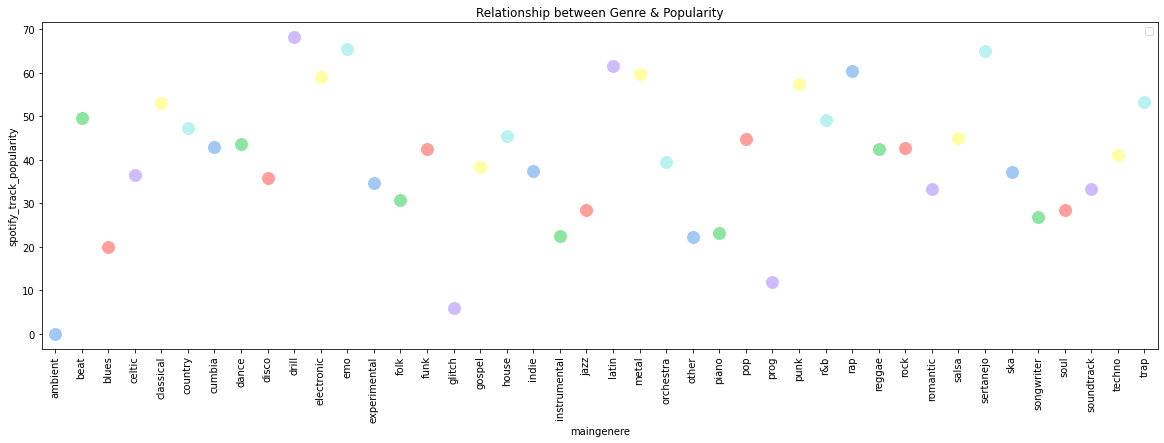

In [49]:
plt.figure(figsize=(20,6))
swarmplot=sb.swarmplot(x="maingenere",y="spotify_track_popularity",data=maingenere_gb,palette='pastel6',s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity")
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------

# As we see there are some non interest information beacause thare are generes that are not so present, so i decide to rebuild the analysis

# **Only the 12 main genere**

In [50]:
numbers_of_genere=billboard_df.maingenere.value_counts()[0:12]
numbers_of_genere
worst_genere=billboard_df.maingenere.value_counts()[12:]
worst_genere
top_12_genere_df=billboard_df.copy()


In [51]:
for i in worst_genere.index:
    top_12_genere_df=top_12_genere_df.drop(top_12_genere_df[top_12_genere_df.maingenere==i].index)

In [52]:
top_12_genere_df.maingenere.unique()

array(['other', 'pop', 'rock', 'rap', 'country', 'soul', 'funk', 'blues',
       'dance', 'disco', 'jazz', 'metal'], dtype=object)

## **Little description of the new dataset**

In [53]:
top_12_genere_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26297 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      26297 non-null  int64  
 1   SongID                     26297 non-null  object 
 2   Performer                  26297 non-null  object 
 3   Song                       26297 non-null  object 
 4   spotify_genre              26297 non-null  object 
 5   spotify_track_duration_ms  26297 non-null  float64
 6   spotify_track_explicit     26297 non-null  object 
 7   spotify_track_album        26297 non-null  object 
 8   danceability               26297 non-null  float64
 9   energy                     26297 non-null  float64
 10  key                        26297 non-null  float64
 11  loudness                   26297 non-null  float64
 12  mode                       26297 non-null  float64
 13  speechiness                26297 non-null  float64


In [54]:
top_12_genere_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26297.0,14745.879378,8517.284241,0.000000,7380.0000,14737.000000,22122.00000,29502.000
spotify_track_duration_ms,26297.0,219900.848164,63490.506125,29688.000000,180933.0000,211164.350000,247400.00000,3079157.000
danceability,26297.0,0.597850,0.142871,0.000000,0.5170,0.593000,0.69200,0.986
energy,26297.0,0.615528,0.185195,0.018100,0.5010,0.620000,0.75300,0.997
key,26297.0,5.244562,3.309782,0.000000,2.0000,5.250000,8.00000,11.000
loudness,26297.0,-8.717219,3.352467,-27.119000,-10.5670,-8.501000,-6.18000,2.291
mode,26297.0,0.731759,0.413056,0.000000,0.7100,1.000000,1.00000,1.000
speechiness,26297.0,0.072794,0.077751,0.000000,0.0331,0.045700,0.07000,0.924
acousticness,26297.0,0.301963,0.264695,0.000003,0.0621,0.240000,0.45500,0.991
instrumentalness,26297.0,0.033805,0.124760,0.000000,0.0000,0.000017,0.00702,0.982


In [55]:
top_12_genere_df.head(3)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,other
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",166106.00,False,The Essential Andy Williams,0.154,0.185,...,1.00,0.0315,0.911,0.000267,0.112,0.15,83.969,4.00,38.00,pop


In [56]:
top_12_genere_df.maingenere.value_counts()

maingenere
pop        7590
rock       5156
other      4167
soul       2499
rap        2259
country    2218
disco       602
jazz        404
blues       397
funk        351
dance       347
metal       307
Name: count, dtype: int64

# **What are the main attribute for the top 12 maingenere**

In [57]:
top_12_genere_gb=top_12_genere_df.groupby('maingenere').mean(numeric_only=True)
top_12_genere_gb

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
maingenere,,,,,,,,,,,,,,,
blues,14780.944584,173611.876675,0.577146,0.553683,5.387380,-10.011668,0.830302,0.059684,0.516466,0.047127,0.233938,0.739947,119.458909,3.773224,19.879194
country,14835.613616,210916.738765,0.568322,0.639403,5.199910,-7.326912,0.917782,0.042315,0.289850,0.005626,0.172910,0.551794,123.309014,3.940478,47.189914
dance,14689.478386,255572.797118,0.655988,0.717787,5.048559,-8.737265,0.602882,0.054095,0.155936,0.051894,0.189902,0.662053,120.939980,3.964035,43.516542
disco,14810.305648,281888.972492,0.681096,0.653839,5.452492,-9.996953,0.581661,0.053306,0.188714,0.075864,0.176903,0.742132,117.358493,3.974153,35.901661
funk,15222.709402,282953.578803,0.683644,0.665774,5.478519,-8.809160,0.581652,0.103012,0.226090,0.027183,0.216644,0.646876,115.392601,3.936980,42.408319
jazz,14602.314356,224205.656337,0.541468,0.467090,4.901980,-11.481770,0.761782,0.048826,0.537674,0.156232,0.212438,0.580740,115.516329,3.813267,28.383366
metal,14642.872964,249005.296417,0.499384,0.818837,5.020847,-5.192085,0.648208,0.061636,0.047404,0.014090,0.180050,0.436412,125.383182,3.954397,59.770033
other,14976.829854,205787.482784,0.588662,0.568874,5.371910,-9.969547,0.748800,0.069358,0.400703,0.077052,0.198066,0.631720,117.758259,3.892669,22.161488
pop,14511.659684,211164.350072,0.596603,0.616528,5.243310,-7.918981,0.705518,0.070311,0.306877,0.014489,0.191355,0.580652,119.326143,3.931099,44.703834


In [58]:
col=sb.color_palette('pastel6')
fig1 = px.bar(top_12_genere_gb, x=top_12_genere_gb.index, y=['danceability','energy','valence'], barmode='group')

fig1.update_layout(title=dict(text="Main characteristics for genere", font=dict(size=50), automargin=True, yref='paper'))

fig1.show()

In [59]:
col=sb.color_palette('pastel6')
fig2 = px.bar(top_12_genere_gb, x=top_12_genere_gb.index, y=['speechiness','instrumentalness','liveness','acousticness'], barmode='group')
fig2.update_layout(title=dict(text="Main characteristics for genere", font=dict(size=50), automargin=True, yref='paper'))
fig2.show()

In [60]:
col=sb.color_palette('pastel6')
fig3 = px.bar(top_12_genere_gb, x=top_12_genere_gb.index, y=['spotify_track_duration_ms'], barmode='group')
fig3.update_layout(title=dict(text="Duration genere", font=dict(size=50), automargin=True, yref='paper'))
fig3.show()

In [61]:
top_12_genere_df.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'maingenere'],
      dtype='object')

In [62]:
col=sb.color_palette('pastel6')
fig4 = px.bar(top_12_genere_gb, x=top_12_genere_gb.index, y=['spotify_track_popularity'], barmode='group')
fig4.update_layout(title=dict(text="What is the most popular genre?", font=dict(size=50), automargin=True, yref='paper'))
fig4.show()

# We want to buid a subplot

------------------------------------------------------------------------------------------------------

* **About correlation? Something change?**

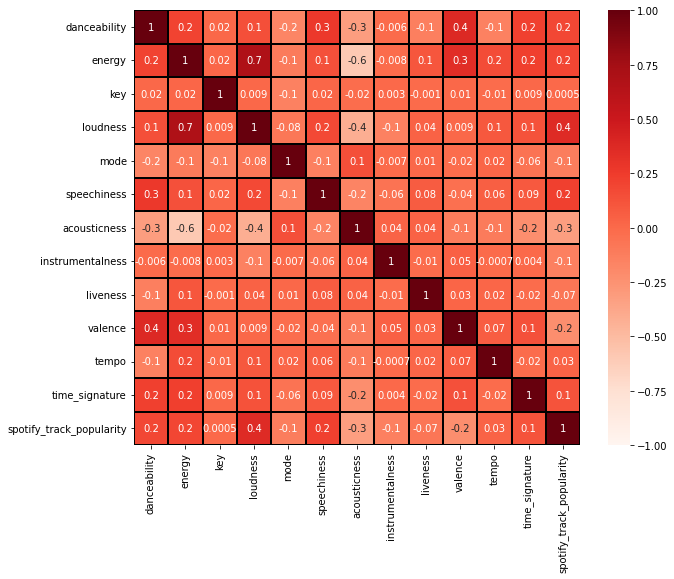

In [63]:
numeric_variable_top_12_df=top_12_genere_df.iloc[:,8:21] 
df_corr_top12 = numeric_variable_df.corr(method='pearson')
plt.figure(figsize=(10,8))
sb.heatmap(df_corr_top12,annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Reds', linewidths=0.1, linecolor='black')
plt.show()

# **nothing change as we aspect**

-----------------------------------------------------------------------------------------------------------------------------

# **We want to find the most popular songs for the 12 main generi**

In [64]:
performer_songs_genere_df=pd.DataFrame(columns=['Performer','Song','maingenere','spotify_track_popularity'])
performer_songs_genere_df['Performer']=billboard_df.Performer
performer_songs_genere_df['Song']=billboard_df.Song
performer_songs_genere_df['maingenere']=billboard_df.maingenere
performer_songs_genere_df['spotify_track_popularity']=billboard_df.spotify_track_popularity


performer_songs_genere_df.index=performer_songs_genere_df.Performer

In [65]:
lista_main_generi_ridotta=['pop', 'rock', 'other', 'soul', 'rap', 'country', 'disco', 'jazz', 'blues', 'funk', 'dance', 'metal']
top_performer_song_per_populatiry_genere_df=pd.DataFrame()
for generi in lista_main_generi_ridotta:
    top_performer_song_per_populatiry_genere_series=performer_songs_genere_df[performer_songs_genere_df.maingenere==generi].sort_values(by='spotify_track_popularity',ascending=False).iloc[0]
    #print(type(top_performer_song_per_populatiry_genere))
    #top_performer_song_per_populatiry_genere_df.info()
    top_performer_song_per_populatiry_genere_df=pd.concat([top_performer_song_per_populatiry_genere_df,top_performer_song_per_populatiry_genere_series],ignore_index=True, axis = 1)
    #print(top_performer_song_per_populatiry_genere_df)

In [66]:
top_songs_for_genre_df=top_performer_song_per_populatiry_genere_df.T
top_songs_for_genre_df

,Performer,Song,maingenere,spotify_track_popularity
0,Tones And I,Dance Monkey,pop,100.0
1,Imagine Dragons,Believer,rock,89.0
2,Masked Wolf,Astronaut In The Ocean,other,96.0
3,John Legend,All Of Me,soul,87.0
4,Post Malone,Circles,rap,98.0
5,Lil Nas X,Montero (Call Me By Your Name),country,100.0
6,Bee Gees,Alive,disco,78.0
7,Etta James,At Last,jazz,75.0
8,Mungo Jerry,In The Summertime,blues,66.0
9,Eminem Featuring Rihanna,Love The Way You Lie,funk,83.0


* **mask for genere**

In [129]:
mask_pop=top_songs_for_genre_df.maingenere=='pop'
#top_songs_for_genre_df[mask_pop]
mask_rock=top_songs_for_genre_df.maingenere=='rock'
mask_other=top_songs_for_genre_df.maingenere=='other'
mask_soul=top_songs_for_genre_df.maingenere=='soul'
mask_rap=top_songs_for_genre_df.maingenere=='rap'
mask_country=top_songs_for_genre_df.maingenere=='country'
mask_disco=top_songs_for_genre_df.maingenere=='disco'
mask_jazz=top_songs_for_genre_df.maingenere=='jazz'
mask_blues=top_songs_for_genre_df.maingenere=='blues'
mask_funk=top_songs_for_genre_df.maingenere=='funk'
mask_dance=top_songs_for_genre_df.maingenere=='dance'
mask_metal=top_songs_for_genre_df.maingenere=='metal'

## capire come mettere leggenda colore in base al genere

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


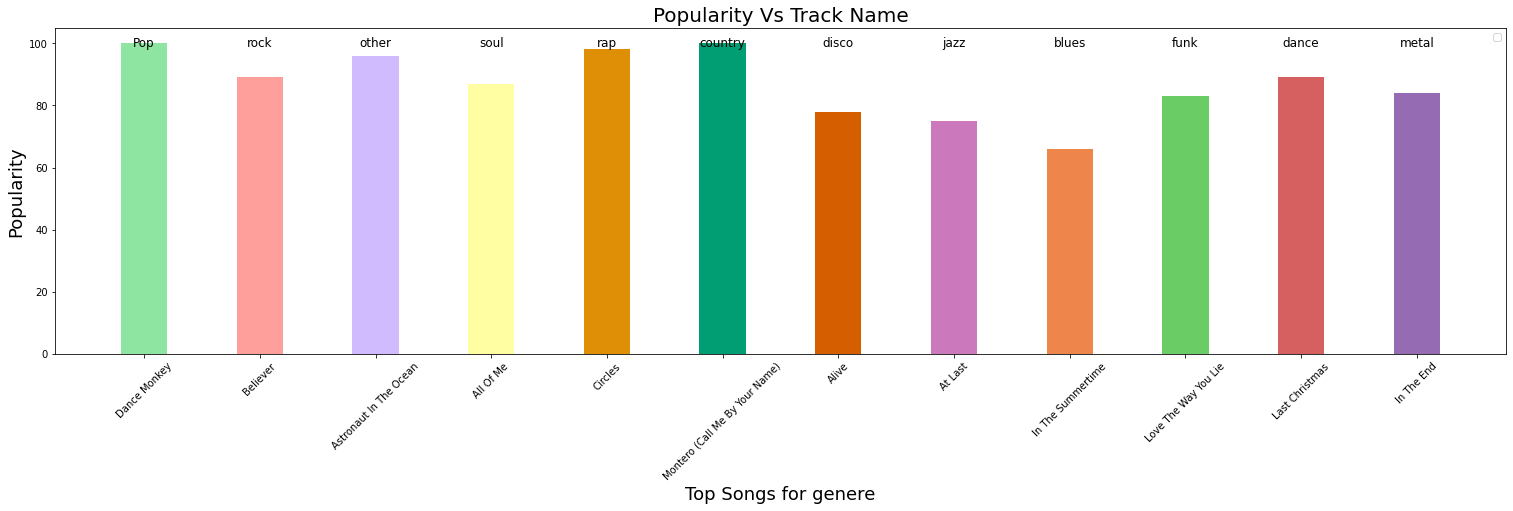

In [200]:
plt.figure(figsize=(26,6))
col1=sb.color_palette('pastel6')
col2=sb.color_palette('colorblind')
col3=sb.color_palette('muted')



plt.bar(top_songs_for_genre_df[mask_pop].Song,top_songs_for_genre_df[mask_pop].spotify_track_popularity,color=col1[1],width=0.4)
plt.text(0,100,'Pop',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_rock].Song,top_songs_for_genre_df[mask_rock].spotify_track_popularity,color=col1[2],width=0.4)
plt.text(1,100,'rock',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_other].Song,top_songs_for_genre_df[mask_other].spotify_track_popularity,color=col1[3],width=0.4)
plt.text(2,100,'other',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_soul].Song,top_songs_for_genre_df[mask_soul].spotify_track_popularity,color=col1[4],width=0.4)
plt.text(3,100,'soul',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_rap].Song,top_songs_for_genre_df[mask_rap].spotify_track_popularity,color=col2[1],width=0.4)
plt.text(4,100,'rap',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_country].Song,top_songs_for_genre_df[mask_country].spotify_track_popularity,color=col2[2],width=0.4)
plt.text(5,100,'country',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_disco].Song,top_songs_for_genre_df[mask_disco].spotify_track_popularity,color=col2[3],width=0.4)
plt.text(6,100,'disco',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_jazz].Song,top_songs_for_genre_df[mask_jazz].spotify_track_popularity,color=col2[4],width=0.4)
plt.text(7,100,'jazz',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_blues].Song,top_songs_for_genre_df[mask_blues].spotify_track_popularity,color=col3[1],width=0.4)
plt.text(8,100,'blues',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_funk].Song,top_songs_for_genre_df[mask_funk].spotify_track_popularity,color=col3[2],width=0.4)
plt.text(9,100,'funk',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_dance].Song,top_songs_for_genre_df[mask_dance].spotify_track_popularity,color=col3[3],width=0.4)
plt.text(10,100,'dance',ha='center',va='center',size='12')
plt.bar(top_songs_for_genre_df[mask_metal].Song,top_songs_for_genre_df[mask_metal].spotify_track_popularity,color=col3[4],width=0.4)
plt.text(11,100,'metal',ha='center',va='center',size='12')

plt.title("Popularity Vs Track Name",size=20)
plt.xlabel('Top Songs for genere',size=18)
plt.ylabel('Popularity',size=18)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **Most popular artist** 

In [68]:
most_popular_performer_df=billboard_df.groupby('Performer').sum(numeric_only=True)

In [165]:
ten_most_famous_performer_df=most_popular_performer_df.sort_values(by='spotify_track_popularity',ascending=False)[1:11]
# the first position is glee, so i decide to take from the index 1 to 11

## se si riuscisse a colorare in base al genere anche loro non sarebbe male 

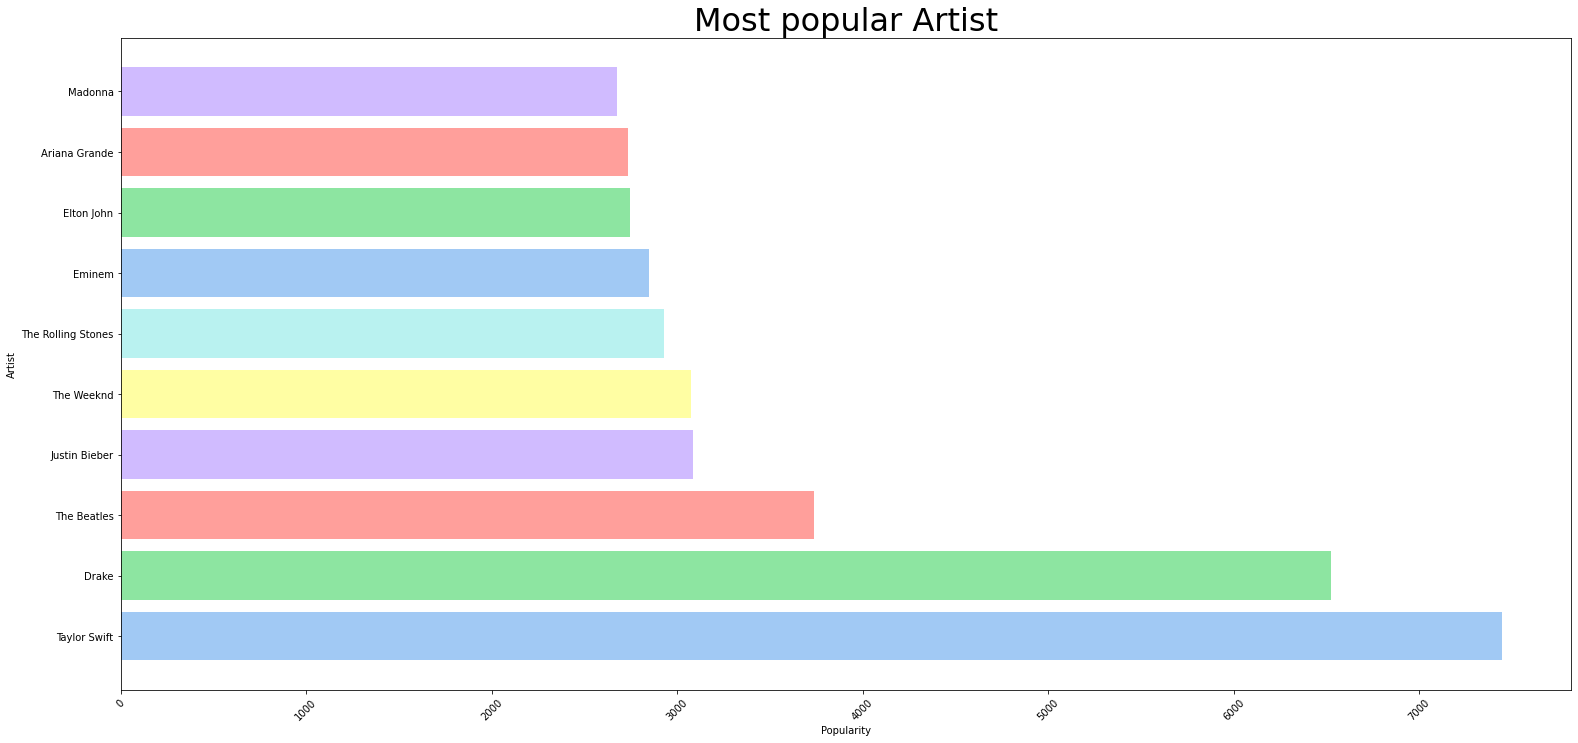

In [159]:
plt.figure(figsize=(26,12))
color=sb.color_palette('pastel6')
plt.barh(ten_most_famous_performer_df.index,ten_most_famous_performer_df.spotify_track_popularity,color=color)
plt.title('Most popular Artist',size=32)
plt.ylabel('Artist')
plt.xlabel('Popularity')
plt.xticks(rotation=45)
plt.show()

-----------------------------------------------------------------------------------

# **Top 50 popular song**

In [71]:
top_50_popular_song=billboard_df.sort_values(by='spotify_track_popularity',ascending=False).head(50)
top_50_popular_song

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
4973,4973,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],209438.0,False,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.588,...,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0,pop
16613,16613,Montero (Call Me By Your Name)Lil Nas X,Lil Nas X,Montero (Call Me By Your Name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",137875.0,True,"{'album_type': 'single', 'artists': [{'externa...",0.610,0.508,...,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,100.0,country
20368,20368,RoxanneArizona Zervas,Arizona Zervas,Roxanne,['pop rap'],163636.0,True,ROXANNE,0.621,0.601,...,0.0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,5.0,99.0,pop
16256,16256,MemoriesMaroon 5,Maroon 5,Memories,"['pop', 'pop rock']",189486.0,False,Memories,0.764,0.320,...,1.0,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,4.0,98.0,pop
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",215280.0,False,Hollywood's Bleeding,0.695,0.762,...,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0,rap
5986,5986,Don't Start NowDua Lipa,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",183290.0,False,Don't Start Now,0.794,0.793,...,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0,pop
26336,26336,TusaKarol G & Nicki Minaj,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",200960.0,False,Tusa,0.803,0.715,...,1.0,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,4.0,97.0,latin
6819,6819,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",245425.0,False,everything i wanted,0.704,0.225,...,0.0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,4.0,97.0,pop
1109,1109,All I Want For Christmas Is YouMariah Carey,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",241106.0,False,Merry Christmas,0.335,0.625,...,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0,pop
7008,7008,FallingTrevor Daniel,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",159381.0,False,Falling,0.784,0.430,...,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0,r&b


In [72]:
top_50_popular_song_df=pd.DataFrame(columns=['Performer','Song','spotify_track_popularity','maingenere'])
top_50_popular_song_df['Performer']=top_50_popular_song.Performer
top_50_popular_song_df['Song']=top_50_popular_song.Song
top_50_popular_song_df['spotify_track_popularity']=top_50_popular_song.spotify_track_popularity
top_50_popular_song_df['maingenere']=top_50_popular_song.maingenere

top_50_popular_song_df.head(5)

,Performer,Song,spotify_track_popularity,maingenere
4973,Tones And I,Dance Monkey,100.0,pop
16613,Lil Nas X,Montero (Call Me By Your Name),100.0,country
20368,Arizona Zervas,Roxanne,99.0,pop
16256,Maroon 5,Memories,98.0,pop
4201,Post Malone,Circles,98.0,rap


* **generi più popolari nella top 50**

In [73]:
most_popular_generes_in_top50songs=top_50_popular_song_df.groupby('maingenere').mean(numeric_only=True)
most_popular_generes_in_top50songs

,spotify_track_popularity
maingenere,
country,100.000
latin,93.600
other,96.000
pop,94.625
r&b,97.000
rap,93.600


In [74]:
print(type(most_popular_generes_in_top50songs))

<class 'pandas.core.frame.DataFrame'>


In [75]:
most_popular_generes_in_top50songs.index[0]

'country'

In [76]:
most_popular_generes_in_top50songs.spotify_track_popularity[0]

100.0

In [77]:
# non so che grafico fare

* **i want to find wich characteristics have the most popular songs**

In [78]:
top_50_popular_song.max()


index                                                                    29451
SongID                                        everything i wantedBillie Eilish
Performer                                                            blackbear
Song                                                       everything i wanted
spotify_genre                                                          ['rap']
spotify_track_duration_ms                                             301714.0
spotify_track_explicit                                                    True
spotify_track_album          {'album_type': 'single', 'artists': [{'externa...
danceability                                                             0.896
energy                                                                   0.825
key                                                                       11.0
loudness                                                                 -3.28
mode                                                

# **Which song 'have most valence' (positività trasmessa dalla canzone)**

* **What are the most 'positive' genere**

In [184]:
top_12_genere_df.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'maingenere'],
      dtype='object')

# **What are the longest songs?**

In [79]:
billboard_df.head(2)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],205787.48,unknown,single,0.59,0.57,...,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],205787.48,unknown,single,0.59,0.57,...,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,other


* **For better compriencion i decide to convert ms in minute**

In [185]:
spotify_track_duration_ms_maingenere_df=pd.DataFrame(columns=['maingenere','Song','Performer','spotify_track_duration_minute'])
spotify_track_duration_ms_maingenere_df['maingenere']=billboard_df.maingenere
spotify_track_duration_ms_maingenere_df['Song']=billboard_df.Song
spotify_track_duration_ms_maingenere_df['Performer']=billboard_df.Performer
spotify_track_duration_ms_maingenere_df['spotify_track_duration_minute']=round(billboard_df.spotify_track_duration_ms/60000,2)

spotify_track_duration_ms_maingenere_df.head(3)

,maingenere,Song,Performer,spotify_track_duration_minute
0,other,-twistin'-White Silver Sands,Bill Black's Combo,3.43
1,other,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,3.43
2,pop,......And Roses And Roses,Andy Williams,2.77


In [186]:
first_10_duration_df=spotify_track_duration_ms_maingenere_df.sort_values(by='spotify_track_duration_minute',ascending=False)[:10]
first_10_duration_df


,maingenere,Song,Performer,spotify_track_duration_minute
21033,other,Sexual,Goddess,51.32
26259,rock,Tubular Bells,Mike Oldfield,26.02
1826,dance,Autobahn,Kraftwerk,22.78
3506,soul,By The Time I Get To Phoenix,Isaac Hayes,18.74
15570,pop,Love To Love You Baby,Donna Summer,16.81
26118,other,Trapped In The Closet,R. Kelly,16.54
3973,jazz,Chameleon,Herbie Hancock,15.69
10181,disco,House Of The Rising Sun,Santa Esmeralda,15.02
26044,other,Touch Me Baby,Ultimate,14.49
5609,rock,Do You Feel Like We Do,Peter Frampton,13.91


* **For the rappresentation we don't want sort it, for a better rappresentation** 

In [82]:
# try to do

In [195]:
first_10_duration_notsort_df=spotify_track_duration_ms_maingenere_df[:10]

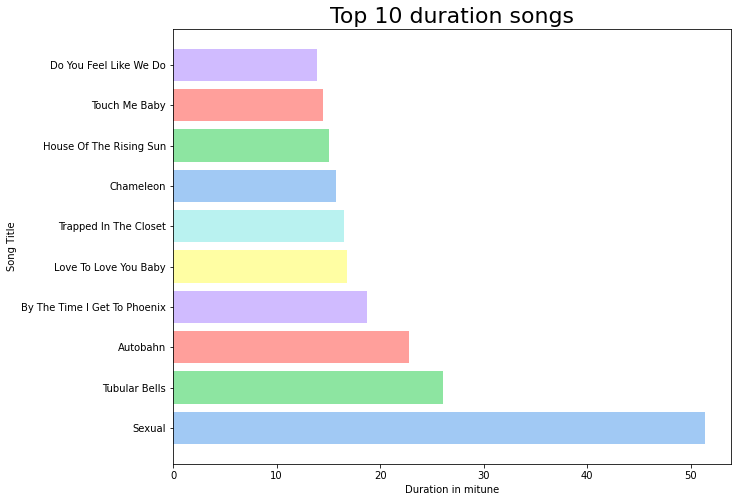

In [196]:
plt.figure(figsize=(10,8))
color=color=sb.color_palette('pastel6')
plt.barh(first_10_duration_df.Song,first_10_duration_df.spotify_track_duration_minute,color=color)
plt.title('Top 10 duration songs',size=22)
plt.xlabel('Duration in mitune')
plt.ylabel('Song Title')
plt.show()

# **Best live Performer**

In [85]:
performer_gb_df=billboard_df.groupby('Performer').sum(numeric_only=True)
performer_gb_df.head(2)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
"""Groove"" Holmes",43995,585191.66,1.093,0.957,12.9,-21.418,1.76,0.0824,1.323,1.03600,0.502,1.104,209.185,7.81,56.38
"""Little"" Jimmy Dickens",16134,151693.00,0.660,0.801,4.0,-8.446,1.00,0.1150,0.738,0.00001,0.627,0.867,104.374,4.00,41.00


* **i want create a df with only the variable that i'm interesteed in**    
    * **now i sort the df by liveness**

In [86]:
best_liveness_df=pd.DataFrame(columns=['Performer','liveness'])
best_liveness_df['Performer']=billboard_df.Performer
best_liveness_df['liveness']=billboard_df.liveness

best_liveness_df.head()

,Performer,liveness
0,Bill Black's Combo,0.200
1,Augie Rios,0.200
2,Andy Williams,0.112
3,Sandy Nelson,0.145
4,Britney Spears,0.443


In [87]:
best_10_live_performer=best_liveness_df.sort_values(by='liveness',ascending=False)[:10]
best_10_live_performer

,Performer,liveness
14564,The Band,0.999
6576,Cheryl Lynn,0.997
21535,Tesla,0.991
10571,Linda Ronstadt,0.990
28094,Blues Brothers,0.990
14868,Opus,0.989
15839,Ambrosia,0.989
20216,John Fogerty,0.988
20490,The Guess Who,0.988
14912,Pseudo Echo,0.987


# **box explicit/maingenere**

In [88]:
worst_genere2=billboard_df.maingenere.value_counts()[5:]
worst_genere2

maingenere
country         2218
disco            602
jazz             404
blues            397
funk             351
dance            347
metal            307
folk             305
house            242
indie            178
r&b              158
latin            139
trap              94
emo               89
reggae            79
instrumental      73
punk              39
romantic          30
gospel            25
classical         23
drill             19
songwriter        18
soundtrack        16
beat              12
piano             11
celtic            11
electronic        10
techno             9
ska                8
experimental       5
sertanejo          2
glitch             2
orchestra          2
ambient            2
salsa              1
prog               1
cumbia             1
Name: count, dtype: int64

In [89]:
top_12_genere_df=billboard_df.copy()

for i in worst_genere2.index:
    top_12_genere_df=top_12_genere_df.drop(top_12_genere_df[top_12_genere_df.maingenere==i].index)

In [173]:
top_12_genere_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21671 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      21671 non-null  int64  
 1   SongID                     21671 non-null  object 
 2   Performer                  21671 non-null  object 
 3   Song                       21671 non-null  object 
 4   spotify_genre              21671 non-null  object 
 5   spotify_track_duration_ms  21671 non-null  float64
 6   spotify_track_explicit     21671 non-null  object 
 7   spotify_track_album        21671 non-null  object 
 8   danceability               21671 non-null  float64
 9   energy                     21671 non-null  float64
 10  key                        21671 non-null  float64
 11  loudness                   21671 non-null  float64
 12  mode                       21671 non-null  float64
 13  speechiness                21671 non-null  float64


In [90]:
#sb.catplot(x = "loudness", y = "energy", kind = "box", data = top_12_genere_df)

<Axes: xlabel='spotify_track_explicit', ylabel='maingenere'>

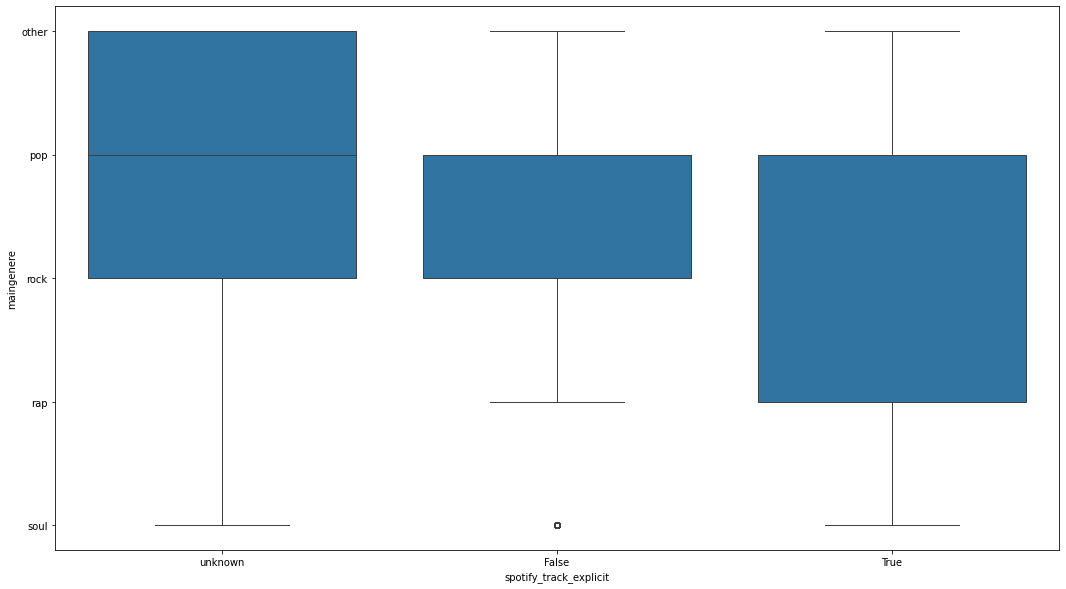

In [182]:
plt.figure(figsize=(18,10))
sb.boxplot(x = "spotify_track_explicit", y = "maingenere", data = top_12_genere_df,color=)

In [176]:
top_12_genere_df.loudness.max()

2.291

In [177]:
top_12_genere_df.loudness.min()

-27.01

In [178]:
top_12_genere_df.energy.max()

0.996

In [180]:
top_12_genere_df.energy.min()

0.0181

------------------------------------------------------------------------------------------------------------------

# **4**

# **Metal**

In [92]:
mask_metal=billboard_df.maingenere == 'metal'

In [93]:
metal_df=billboard_df[mask_metal]
metal_df.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
81,81,(I Hate) Everything About YouThree Days Grace,Three Days Grace,(I Hate) Everything About You,"['alternative metal', 'canadian metal', 'canad...",231480.0,False,Three Days Grace (Deluxe Version),0.498,0.830,...,0.0,0.0421,0.004610,0.000000,0.1390,0.453,89.342,4.0,74.0,metal
236,236,(You Want To) Make A MemoryBon Jovi,Bon Jovi,(You Want To) Make A Memory,"['glam metal', 'rock']",276453.0,False,Lost Highway,0.496,0.440,...,1.0,0.0263,0.117000,0.000111,0.1200,0.208,147.960,4.0,54.0,metal
816,816,AddictedSaving Abel,Saving Abel,Addicted,"['alternative metal', 'nu metal', 'post-grunge']",222826.0,True,Saving Abel,0.512,0.865,...,1.0,0.0338,0.000821,0.000000,0.0982,0.529,138.017,4.0,68.0,metal
832,832,AerialsSystem Of A Down,System Of A Down,Aerials,"['alternative metal', 'nu metal', 'post-grunge...",235053.0,False,Toxicity,0.364,0.922,...,0.0,0.0566,0.000918,0.035000,0.0696,0.227,79.342,4.0,75.0,metal
1018,1018,AliveP.O.D.,P.O.D.,Alive,"['alternative metal', 'funk metal', 'nu metal'...",205026.0,False,Satellite (U.S. Version WEA Distribution),0.421,0.950,...,1.0,0.0768,0.000012,0.000214,0.3140,0.553,80.912,4.0,64.0,metal


* **Artist that have the most popular songs in the chart**

In [94]:
most_popular_metal_performers_df=metal_df.sort_values(by='spotify_track_popularity',ascending=False)

In [95]:
most_popular_25_metal_performers_df=most_popular_metal_performers_df.Performer.value_counts()[0:25]

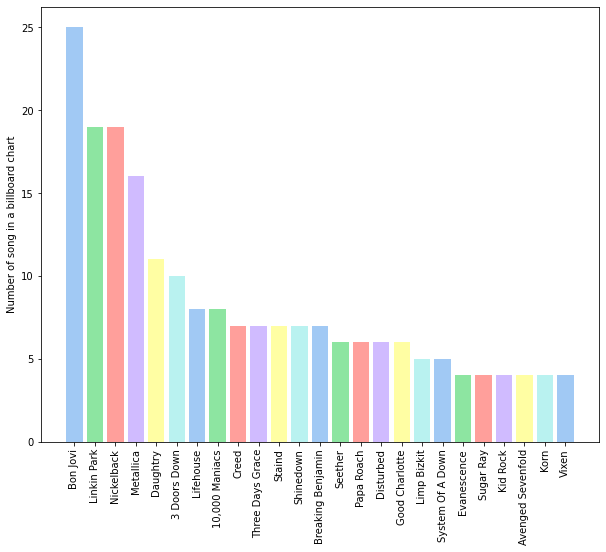

In [96]:
plt.figure(figsize=(10,8))
col=sb.color_palette('pastel6')
plt.bar(most_popular_25_metal_performers_df.index,most_popular_25_metal_performers_df,color=col)
plt.ylabel('Number of song in a billboard chart')
plt.xticks(rotation=90)
plt.show()

## **Most popular metal band for song popularity**

In [97]:
performer_metal_popularity_df= pd.DataFrame(columns=['Performer','Song','spotify_track_popularity'])
performer_metal_popularity_df['Performer']=metal_df.Performer
performer_metal_popularity_df['Song']=metal_df.Song
performer_metal_popularity_df['spotify_track_popularity']=metal_df.spotify_track_popularity

performer_metal_popularity_df.index=performer_metal_popularity_df.Performer


In [98]:
del performer_metal_popularity_df['Performer']

In [99]:
performer_metal_popularity_df

,Song,spotify_track_popularity
Performer,,
Three Days Grace,(I Hate) Everything About You,74.00
Bon Jovi,(You Want To) Make A Memory,54.00
Saving Abel,Addicted,68.00
System Of A Down,Aerials,75.00
P.O.D.,Alive,64.00
...,...,...
Grace Featuring G-Eazy,You Don't Own Me,59.77
Bon Jovi,You Give Love A Bad Name,81.00
Judas Priest,You've Got Another Thing Comin',59.77


In [100]:
performer_metal_popularity_df.max()

Song                        Zombie
spotify_track_popularity      84.0
dtype: object

In [101]:
performer_metal_popularity_df.spotify_track_popularity.mean()

59.77003257328991

In [102]:
performer_metal_popularity_df.min()

Song                        (I Hate) Everything About You
spotify_track_popularity                              0.0
dtype: object

In [103]:
mask_most_popular_metalbend= performer_metal_popularity_df.spotify_track_popularity > performer_metal_popularity_df.spotify_track_popularity.mean()

In [104]:
most_popular_metalbend_df = performer_metal_popularity_df[mask_most_popular_metalbend]
most_popular_metalbend_df.head(10)

,Song,spotify_track_popularity
Performer,,
Three Days Grace,(I Hate) Everything About You,74.0
Saving Abel,Addicted,68.0
System Of A Down,Aerials,75.0
P.O.D.,Alive,64.0
Flyleaf,All Around Me,62.0
Kid Rock,All Summer Long,73.0
Bon Jovi,Always,77.0
Saliva,Always,64.0
Three Days Grace,Animal I Have Become,73.0


* **i have to sort it**

In [105]:
sorted_most_popular_metal_df=most_popular_metalbend_df.sort_values(by='spotify_track_popularity',ascending=False)
sorted_most_popular_metal_df.head(10)

,Song,spotify_track_popularity
Performer,,
Linkin Park,In The End,84.0
Bon Jovi,Livin' On A Prayer,84.0
Linkin Park,Numb,83.0
System Of A Down,Chop Suey,82.0
Papa Roach,Last Resort,81.0
Bon Jovi,You Give Love A Bad Name,81.0
Evanescence Featuring Paul McCoy,Bring Me To Life,80.0
3 Doors Down,Kryptonite,79.0
Nickelback,How You Remind Me,79.0


In [106]:
ten_most_popular_matal_performer=sorted_most_popular_metal_df[0:10]
ten_most_popular_matal_performer

,Song,spotify_track_popularity
Performer,,
Linkin Park,In The End,84.0
Bon Jovi,Livin' On A Prayer,84.0
Linkin Park,Numb,83.0
System Of A Down,Chop Suey,82.0
Papa Roach,Last Resort,81.0
Bon Jovi,You Give Love A Bad Name,81.0
Evanescence Featuring Paul McCoy,Bring Me To Life,80.0
3 Doors Down,Kryptonite,79.0
Nickelback,How You Remind Me,79.0


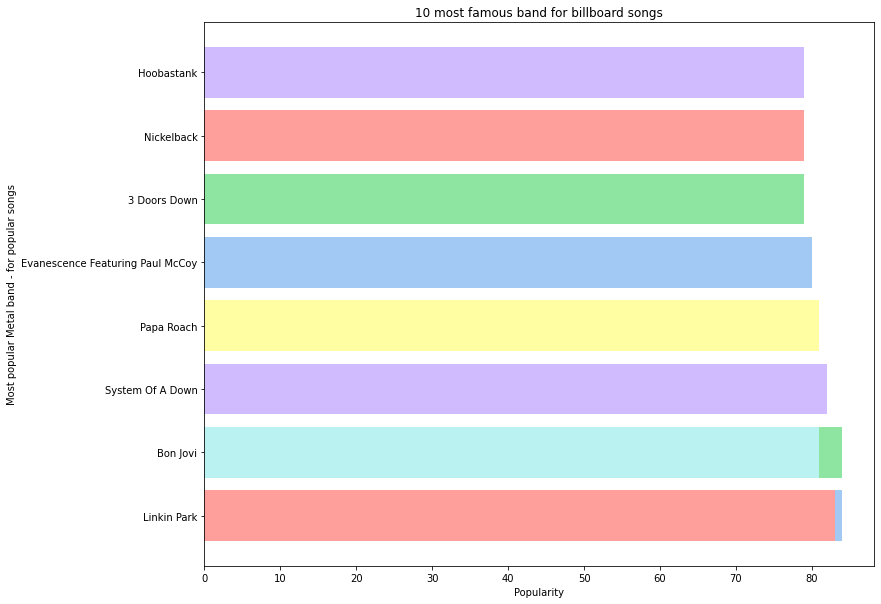

In [107]:
plt.figure(figsize=(12,10))
color=sb.color_palette('pastel6')
plt.barh(ten_most_popular_matal_performer.index,ten_most_popular_matal_performer['spotify_track_popularity'],color=color)
plt.title('10 most famous band for billboard songs')
plt.xlabel('Popularity')
plt.ylabel('Most popular Metal band - for popular songs')
plt.show()

## **What are the best live Metal band**

In [108]:
metal_df.head(2)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
81,81,(I Hate) Everything About YouThree Days Grace,Three Days Grace,(I Hate) Everything About You,"['alternative metal', 'canadian metal', 'canad...",231480.0,False,Three Days Grace (Deluxe Version),0.498,0.83,...,0.0,0.0421,0.00461,0.000000,0.139,0.453,89.342,4.0,74.0,metal
236,236,(You Want To) Make A MemoryBon Jovi,Bon Jovi,(You Want To) Make A Memory,"['glam metal', 'rock']",276453.0,False,Lost Highway,0.496,0.44,...,1.0,0.0263,0.11700,0.000111,0.120,0.208,147.960,4.0,54.0,metal


In [109]:
metal_performer_gb=metal_df.groupby('Performer').sum(numeric_only=True)
metal_performer_gb.head(3)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
10 Years,27019,229866.0,0.391,0.801,6.00,-5.102,0.00,0.0813,0.000426,0.000208,0.0662,0.341,146.729,4.00,64.00
"10,000 Maniacs",123886,1786447.8,4.327,6.269,37.12,-43.888,4.90,1.3320,1.102200,0.060829,1.2966,4.179,931.521,31.70,358.62
3 Doors Down,130005,2485522.3,5.063,7.833,56.02,-56.031,4.65,0.3932,0.202300,0.010052,1.3523,3.517,1115.333,39.95,624.77


In [110]:
best_live_metal_df=pd.DataFrame(columns=['Performer','liveness'])
best_live_metal_df['Performer']=metal_performer_gb.index
best_live_metal_df['liveness']=metal_performer_gb.liveness.values

best_live_metal_df.head(5)

,Performer,liveness
0,10 Years,0.0662
1,"10,000 Maniacs",1.2966
2,3 Doors Down,1.3523
3,Alien Ant Farm,0.1500
4,Apocalyptica Featuring Adam Gontier,0.0799


In [111]:
top_15_live_metal_performer=best_live_metal_df.sort_values(by='liveness',ascending=False)[0:15]
top_15_live_metal_performer

,Performer,liveness
10,Bon Jovi,5.0615
53,Linkin Park,4.3654
59,Nickelback,3.4933
56,Metallica,3.1407
51,Limp Bizkit,1.8212
20,Daughtry,1.6709
62,Papa Roach,1.4620
17,Creed,1.4370
2,3 Doors Down,1.3523
1,"10,000 Maniacs",1.2966


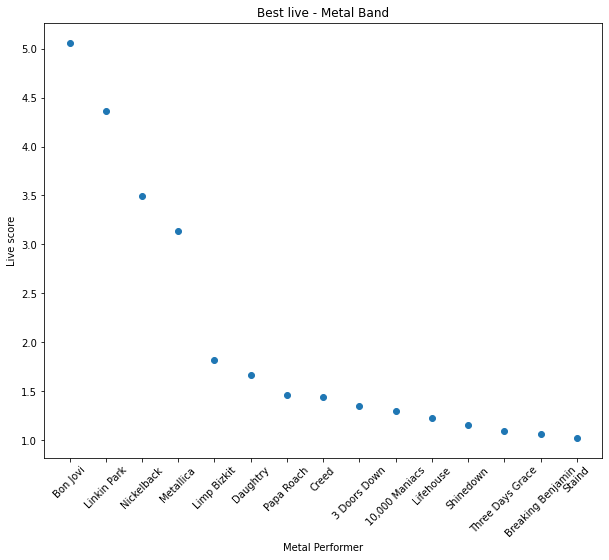

In [112]:
plt.figure(figsize=(10,8))
col=color=sb.color_palette('pastel6')
plt.scatter(top_15_live_metal_performer.Performer,top_15_live_metal_performer.liveness)
plt.xticks(rotation=45)
plt.title('Best live - Metal Band')
plt.xlabel('Metal Performer')
plt.ylabel('Live score')
plt.show()

## **Radar plot**

In [113]:
metal_performer_gb.head(3)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
10 Years,27019,229866.0,0.391,0.801,6.00,-5.102,0.00,0.0813,0.000426,0.000208,0.0662,0.341,146.729,4.00,64.00
"10,000 Maniacs",123886,1786447.8,4.327,6.269,37.12,-43.888,4.90,1.3320,1.102200,0.060829,1.2966,4.179,931.521,31.70,358.62
3 Doors Down,130005,2485522.3,5.063,7.833,56.02,-56.031,4.65,0.3932,0.202300,0.010052,1.3523,3.517,1115.333,39.95,624.77


In [114]:
r=[1,2,3,4]
t=['danceability','energy','loudness','instrumentalness']
fig=px.line_polar(metal_performer_gb,r,t,line_close=True)
fig.show()

## **experiment**

In [115]:
sort_bill_df=billboard_df.sort_values(by='spotify_track_popularity',ascending=False).head(30)
sort_bill_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
4973,4973,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],209438.0,False,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.588,...,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0,pop
16613,16613,Montero (Call Me By Your Name)Lil Nas X,Lil Nas X,Montero (Call Me By Your Name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",137875.0,True,"{'album_type': 'single', 'artists': [{'externa...",0.610,0.508,...,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,100.0,country
20368,20368,RoxanneArizona Zervas,Arizona Zervas,Roxanne,['pop rap'],163636.0,True,ROXANNE,0.621,0.601,...,0.0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,5.0,99.0,pop
16256,16256,MemoriesMaroon 5,Maroon 5,Memories,"['pop', 'pop rock']",189486.0,False,Memories,0.764,0.320,...,1.0,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,4.0,98.0,pop
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",215280.0,False,Hollywood's Bleeding,0.695,0.762,...,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0,rap
5986,5986,Don't Start NowDua Lipa,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",183290.0,False,Don't Start Now,0.794,0.793,...,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0,pop
26336,26336,TusaKarol G & Nicki Minaj,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",200960.0,False,Tusa,0.803,0.715,...,1.0,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,4.0,97.0,latin
6819,6819,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",245425.0,False,everything i wanted,0.704,0.225,...,0.0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,4.0,97.0,pop
1109,1109,All I Want For Christmas Is YouMariah Carey,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",241106.0,False,Merry Christmas,0.335,0.625,...,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0,pop
7008,7008,FallingTrevor Daniel,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",159381.0,False,Falling,0.784,0.430,...,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0,r&b


* **A7X mask**

In [116]:
mask_a7x=billboard_df.Performer=='Avenged Sevenfold'

In [117]:
a7x_df=billboard_df[mask_a7x]
a7x_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
2288,2288,Bat CountryAvenged Sevenfold,Avenged Sevenfold,Bat Country,"['alternative metal', 'nu metal', 'post-grunge']",311813.0,False,City of Evil,0.541,0.968,...,1.0,0.0396,0.000248,0.000008,0.423,0.505,125.040,4.0,70.0,metal
8942,8942,Hail To The KingAvenged Sevenfold,Avenged Sevenfold,Hail To The King,"['alternative metal', 'nu metal', 'post-grunge']",305906.0,False,Hail to the King,0.585,0.887,...,0.0,0.0362,0.000376,0.051800,0.132,0.711,118.035,4.0,76.0,metal
17525,17525,NightmareAvenged Sevenfold,Avenged Sevenfold,Nightmare,"['alternative metal', 'nu metal', 'post-grunge']",374453.0,True,Nightmare,0.554,0.949,...,1.0,0.0787,0.000318,0.000100,0.200,0.233,129.984,4.0,73.0,metal
17809,17809,Not Ready To DieAvenged Sevenfold,Avenged Sevenfold,Not Ready To Die,"['alternative metal', 'nu metal', 'post-grunge']",425264.0,False,Not Ready to Die,0.434,0.984,...,1.0,0.1230,0.000178,0.000226,0.080,0.158,160.011,4.0,58.0,metal


In [118]:
billboard_df.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'maingenere'],
      dtype='object')

* **mask Tool**

In [119]:
mask_toll=billboard_df.Performer=='Tool'

In [120]:
tool_df=billboard_df[mask_toll]
tool_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
7094,7094,Fear InoculumTool,Tool,Fear Inoculum,"['alternative metal', 'alternative rock', 'art...",620101.0,False,Fear Inoculum,0.313,0.584,...,1.0,0.0415,0.000824,0.52,0.0529,0.159,87.894,4.0,71.0,metal
20810,20810,SchismTool,Tool,Schism,"['alternative metal', 'alternative rock', 'art...",403533.0,False,Lateralus,0.567,0.714,...,0.0,0.0302,0.001200,0.42,0.1860,0.191,107.438,3.0,70.0,metal


* **SOAD MASK**

In [121]:
mask_soad=billboard_df.Performer=='System Of A Down'
soad_df=billboard_df[mask_soad]
soad_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
832,832,AerialsSystem Of A Down,System Of A Down,Aerials,"['alternative metal', 'nu metal', 'post-grunge...",235053.0,False,Toxicity,0.364,0.922,...,0.00,0.0566,0.000918,0.035000,0.0696,0.2270,79.342,4.00,75.00,metal
1864,1864,B.Y.O.B.System Of A Down,System Of A Down,B.Y.O.B.,"['alternative metal', 'nu metal', 'post-grunge...",249005.3,unknown,single,0.500,0.820,...,0.65,0.0600,0.050000,0.010000,0.1800,0.4400,125.380,3.95,59.77,metal
4153,4153,Chop SueySystem Of A Down,System Of A Down,Chop Suey,"['alternative metal', 'nu metal', 'post-grunge...",210240.0,False,Toxicity,0.419,0.934,...,0.00,0.1200,0.000278,0.001500,0.1320,0.2860,127.288,4.00,82.00,metal
10419,10419,HypnotizeSystem Of A Down,System Of A Down,Hypnotize,"['alternative metal', 'nu metal', 'post-grunge...",189440.0,False,Hypnotize,0.274,0.920,...,1.00,0.0489,0.030300,0.000412,0.1150,0.0397,153.986,4.00,69.00,metal
26074,26074,ToxicitySystem Of A Down,System Of A Down,Toxicity,"['alternative metal', 'nu metal', 'post-grunge...",218933.0,False,Toxicity,0.413,0.873,...,1.00,0.0535,0.000264,0.002500,0.2040,0.4810,116.681,3.00,79.00,metal


In [122]:
# si potrebbe provare a fare uno 'studio delle loro caratteristiche in base ai brani finiti su billboard'

# **Rock genere**

In [123]:
mask_rock=billboard_df.maingenere == 'rock'
rock_df=billboard_df[mask_rock]
rock_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",172066.0,False,Compelling Percussion,0.588,0.672,...,0.0,0.0361,0.00256,0.745000,0.1450,0.8010,121.962,4.0,11.0,rock
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",219813.0,False,Radio Hits Of the '80s,0.647,0.686,...,0.0,0.0274,0.43200,0.000006,0.1330,0.9520,155.697,4.0,40.0,rock
18,18,"""Cherry Cherry"" from Hot August NightNeil Diamond",Neil Diamond,"""Cherry Cherry"" from Hot August Night","['adult standards', 'brill building pop', 'fol...",443320.0,False,Hot August Night / NYC (Live From Madison Squa...,0.340,0.948,...,1.0,0.1370,0.09410,0.000907,0.8670,0.6040,172.349,4.0,16.0,rock
33,33,(Believed You Were) Lucky'Til Tuesday,'Til Tuesday,(Believed You Were) Lucky,"['boston rock', 'dance rock', 'new romantic', ...",216973.0,False,Everything's Different Now,0.612,0.523,...,1.0,0.0321,0.44800,0.000002,0.0727,0.4950,124.315,4.0,17.0,rock
34,34,(Between A) Rock And A Hard PlaceCutting Crew,Cutting Crew,(Between A) Rock And A Hard Place,"['album rock', 'dance rock', 'mellow gold', 'n...",227960.0,False,The Best Of Cutting Crew,0.615,0.845,...,0.0,0.0393,0.09280,0.000028,0.0755,0.5850,117.444,4.0,19.0,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29458,29458,Your Smiling FaceJames Taylor,James Taylor,Your Smiling Face,"['adult standards', 'folk', 'folk rock', 'mell...",165400.0,False,JT,0.683,0.515,...,1.0,0.0592,0.13700,0.000007,0.0816,0.7670,88.827,4.0,61.0,rock
29459,29459,Your SongElton John,Elton John,Your Song,"['glam rock', 'mellow gold', 'piano rock']",241786.0,False,Elton John,0.561,0.302,...,1.0,0.0319,0.82500,0.000005,0.1310,0.2780,128.172,4.0,77.0,rock
29460,29460,Your SongRod Stewart,Rod Stewart,Your Song,"['adult standards', 'mellow gold', 'soft rock']",287466.0,False,Karaoke - Rod Stewart,0.549,0.314,...,1.0,0.0333,0.27300,0.933000,0.2970,0.0903,127.962,4.0,2.0,rock
29467,29467,Your Wildest DreamsThe Moody Blues,The Moody Blues,Your Wildest Dreams,"['album rock', 'art rock', 'british invasion',...",291000.0,False,The Other Side Of Life,0.535,0.585,...,1.0,0.0378,0.31800,0.037900,0.2790,0.6600,141.377,4.0,54.0,rock


In [124]:
most_popular_rock_song=rock_df.sort_values(by='spotify_track_popularity',ascending=False)
most_popular_rock_song.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
2534,2534,BelieverImagine Dragons,Imagine Dragons,Believer,['modern rock'],204346.0,False,Evolve,0.776,0.780,...,0.0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,4.0,89.0,rock
28475,28475,Wonderful ChristmastimePaul McCartney,Paul McCartney,Wonderful Christmastime,"['album rock', 'classic rock', 'folk rock', 'm...",227653.0,False,McCartney II,0.774,0.511,...,1.0,0.0319,0.32200,0.000000,0.0672,0.771,94.736,4.0,89.0,rock
7437,7437,Follow YouImagine Dragons,Imagine Dragons,Follow You,"['modern rock', 'rock']",175643.0,False,"{'album_type': 'single', 'artists': [{'externa...",0.542,0.732,...,1.0,0.0521,0.00209,0.000079,0.4960,0.489,124.912,4.0,87.0,rock
25654,25654,ThunderImagine Dragons,Imagine Dragons,Thunder,['modern rock'],187146.0,False,Evolve,0.605,0.822,...,1.0,0.0438,0.00671,0.134000,0.1470,0.288,167.997,4.0,87.0,rock
2929,2929,Blue ChristmasElvis Presley,Elvis Presley,Blue Christmas,"['adult standards', 'rock-and-roll', 'rockabil...",129173.0,False,Elvis' Christmas Album,0.465,0.270,...,1.0,0.0425,0.90200,0.001040,0.1450,0.580,94.519,4.0,86.0,rock
20431,20431,Run Rudolph RunChuck Berry,Chuck Berry,Run Rudolph Run,"['blues rock', 'classic rock', 'rock', 'rock-a...",165733.0,False,Rock 'N' Roll Rarities,0.688,0.711,...,0.0,0.0832,0.78800,0.000026,0.0683,0.935,152.277,4.0,85.0,rock
17252,17252,NaturalImagine Dragons,Imagine Dragons,Natural,['modern rock'],189466.0,False,Origins (Deluxe),0.704,0.611,...,1.0,0.0409,0.21700,0.000000,0.0812,0.220,100.000,4.0,85.0,rock
6680,6680,Every Breath You TakeThe Police,The Police,Every Breath You Take,"['album rock', 'art rock', 'classic rock', 'da...",253920.0,False,Synchronicity (Remastered 2003),0.820,0.452,...,1.0,0.0348,0.54300,0.002940,0.0714,0.740,117.401,4.0,85.0,rock
19439,19439,Pumped Up KicksFoster The People,Foster The People,Pumped Up Kicks,"['indie pop', 'indietronica', 'modern rock', '...",239600.0,False,Torches,0.733,0.710,...,0.0,0.0292,0.14500,0.115000,0.0956,0.965,127.975,4.0,85.0,rock
22941,22941,Stressed Outtwenty one pilots,twenty one pilots,Stressed Out,"['modern rock', 'rock']",202333.0,False,Blurryface,0.734,0.637,...,0.0,0.1410,0.04620,0.000023,0.0602,0.648,169.977,4.0,84.0,rock


In [125]:
top_50_rockperformer_with_mostpresence=most_popular_rock_song.Performer.value_counts()[:50]
top_50_rockperformer_with_mostpresence

Performer
The Beatles                      65
Elton John                       58
The Rolling Stones               57
Neil Diamond                     52
Elvis Presley                    50
Rod Stewart                      47
Chicago                          46
Billy Joel                       41
Barbra Streisand                 34
Daryl Hall John Oates            34
U2                               29
Aerosmith                        28
Johnny Rivers                    28
Roy Orbison                      28
Barry Manilow                    27
Linda Ronstadt                   27
The Doobie Brothers              27
Bruce Springsteen                26
The Who                          26
Bobby Goldsboro                  26
Fleetwood Mac                    25
Journey                          25
David Bowie                      25
KISS                             24
Phil Collins                     24
Electric Light Orchestra         24
Van Halen                        23
Styx              

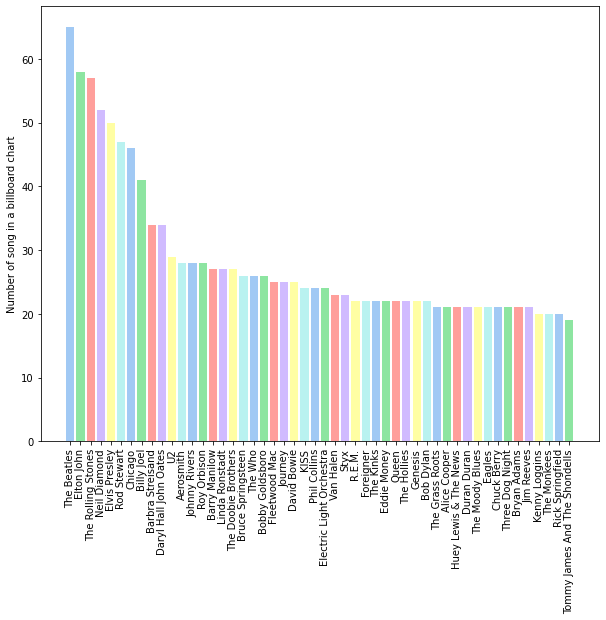

In [126]:
plt.figure(figsize=(10,8))
col=sb.color_palette('pastel6')
plt.bar(top_50_rockperformer_with_mostpresence.index,top_50_rockperformer_with_mostpresence,color=col)
plt.ylabel('Number of song in a billboard chart')
plt.xticks(rotation=90)
plt.show()